# Bike Sharing Demand - Huizhe Wang

# Part 1 -  Background

## What are Bike sharing systems?

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. 

![image.png](https://image.ibb.co/fuTuBT/download_11.png)

## Why users likes Bike sharing systems?

Currently, there are over 500 bike-sharing programs around the world. There are many benefits of Bike Sharing systems: environmental benefit, extends range of transit system, increase viability of other modes, and benefit local business, etc. For example, the more peoples use bikes as their trip mode, the less car used in daily trips. It has a great effect on greenhouse gas emissions and reduce pollution.

## Expectation of Project.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

## Why I choose this Project?

With the popular of bike sharing systems. There are new issues should be solved. There is little bikes to be used in snow days. Bikes always park unorderly to affect the appearance of cities. Put over much bikes in the sparsely populated regions is a waste of resource. With predict the number of bikes using in a given condition: bike renting company would be able to provide a better service to customer, the traffic management teams would be able to plan it better.

## Kaggle Notebook

Before start my own project, I did some surveys about what kagglers did. The github link is https://github.com/huizhewang/INFO7390/blob/master/Kaggle%20Notebook.ipynb. The summaries are as follows:

* By the end date of this competition, 3252 teams from all over the world provided their solutions. There are about 90% teams using Random Forest and Gradient Boost model to do prediction, with little team using other models, for example, Neural Network. There are two reasons for this phenomenon: First, the competition was held in between 2014 and 2015. Neural Network was not much popular as now, most teams would be choose Neural Network as their model; Second, the result of Neural Network was not good, once these teams found a better model, they will replace Neural Network.
* These surveys from kaggles literatures gave some good points:
  * Feature temp and atemp have high correlation, I need only analysis one feature in my own project to avoid multi-collinearity.
  * The datetime column can be used to extract data like the month, day, hour which can be used in model for making better predictions.
  * Random Forest and Gradient Boost model could get good result.
  * Dummy variables and scaling variables are good ideas.
  * Remeber handle the output, let them euqal or bigger than 0.
  * Choose RMSLE which kaggle provided as the own stanard, it will be easy to compare the predict result.
* Extention will be in my own project:
  * Except analysis the basic features, I will create additional features in data exploration to give more categories for the project.
  * Most kaggles pridect count directly. However, Adding the value of registered and casual will equal to count. I will use two way to predict count: predict count directly, predict registered ad casual separately and then get the value of count.
  * Even though RandomForest and GBoost Model are really predict good than Neural Network. However, this project is a final project in course INFO 7390, the propose is learn how to use both machine learning and deep learning. In this project, I still use one kind of Neural Network to predict count as professor suggest.

* license: Background comes form kaggle website. https://www.kaggle.com/c/bike-sharing-demand

#  Part 2 -  Evaluation: 
## RMSLE (Root Mean Squared Logarithmic Error)

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as
![Screen%20Shot%202018-04-18%20at%206.33.29%20PM.png](https://image.ibb.co/hHWEBT/download_12.png)
Where:
```
n is the number of hours in the test set
pi is your predicted count
ai is the actual count
log(x) is the natural logarithm
```
* License: RMSLE comes form kaggle website. https://www.kaggle.com/c/bike-sharing-demand#evaluation


**Result Analysis** 

It is the result of testset. It means the count value per row.

# Part 3 - Load and Prepare Datasets
## 1. Data Introduction 

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

```
datetime - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```
We can see the riders separate into casual riders and registered riders, and the value of count is the total number of the two kinds of riders.

In [1]:
## import Libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import sys
import warnings
warnings.filterwarnings('ignore')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Here I create a new column named `dataset` for the two dataset, because I want to combine the two dataset together and order the data by datetime.

In [2]:
df_train = pd.read_csv("data/train.csv")
df_train['dataset'] = 'train'

df_test = pd.read_csv("data/test.csv")
df_test['dataset'] = 'test'

In [3]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dataset
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


## 2. Data Cleaning 

**Converting datetime column fron str to DatetimeIndex**

The datetime column can be used to extract data like the month, day, hour which can be used in model for making better predictions.

In [4]:
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).day

df_train['DOW'] = pd.DatetimeIndex(df_train.datetime).dayofweek 
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour
df_train['year'] = pd.DatetimeIndex(df_train.datetime).year

df_test['month'] = pd.DatetimeIndex(df_test.datetime).month
df_test['day'] = pd.DatetimeIndex(df_test.datetime).day
df_test['DOW'] = pd.DatetimeIndex(df_test.datetime).dayofweek 
df_test['hour'] = pd.DatetimeIndex(df_test.datetime).hour
df_test['year'] = pd.DatetimeIndex(df_test.datetime).year

In [5]:
dt = pd.DatetimeIndex(df_train['datetime'])
df_train.set_index(dt, inplace=True)
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dataset,month,day,DOW,hour,year
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train,1,1,5,0,2011
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train,1,1,5,1,2011
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train,1,1,5,2,2011
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train,1,1,5,3,2011
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train,1,1,5,4,2011


In [6]:
dt = pd.DatetimeIndex(df_test['datetime'])
df_test.set_index(dt, inplace=True)
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dataset,month,day,DOW,hour,year
2011-01-20 00:00:00,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,test,1,20,3,0,2011
2011-01-20 01:00:00,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,test,1,20,3,1,2011
2011-01-20 02:00:00,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,test,1,20,3,2,2011
2011-01-20 03:00:00,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,test,1,20,3,3,2011
2011-01-20 04:00:00,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,test,1,20,3,4,2011


**Cleaning workingday and holiday varibles**

There are some error in the columns of workingday and holiday. I need clean it before I use.
The code in the document by Github ST7oo is licensed under the MIT License:
https://opensource.org/licenses/MIT

In [7]:
#set workingday and holiday
def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")

#for working day
# tax day
df_train.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
df_train.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1
# thanksgiving friday
df_test.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
df_test.loc[get_day(pd.datetime(2012, 11, 23)), "workingday"] = 0

# for holiday
# tax day
df_train.loc[get_day(pd.datetime(2011, 4, 15)), "holiday"] = 0
df_train.loc[get_day(pd.datetime(2012, 4, 16)), "holiday"] = 0
# thanksgiving friday
df_test.loc[get_day(pd.datetime(2011, 11, 25)), "holiday"] = 1
df_test.loc[get_day(pd.datetime(2012, 11, 23)), "holiday"] = 1
#storms
df_test.loc[get_day(pd.datetime(2012, 5, 21)), "holiday"] = 1
#tornado
df_train.loc[get_day(pd.datetime(2012, 6, 1)), "holiday"] = 1

In [8]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dataset,month,day,DOW,hour,year
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train,1,1,5,0,2011
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train,1,1,5,1,2011
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train,1,1,5,2,2011
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train,1,1,5,3,2011
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train,1,1,5,4,2011


In [9]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,DOW,hour,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.026364,0.685284,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,9.992559,3.013963,11.541613,2011.501929
std,1.116174,0.160223,0.464424,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,5.476608,2.004585,6.915838,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,5.000000,1.000000,6.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,10.000000,3.000000,12.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,15.000000,5.000000,18.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,19.000000,6.000000,23.000000,2012.000000


**Combine train dataset and test dataset into one dataset**

In order to order data, I need comnbine the two dataset together and order it by datetime. Moreover, because the evaluation is RMSLE. Using logarithmic transformation of target values will be easier. Here I add three column named casual_log, registered_log, count_log

In [10]:
# combine train and test data into one df
df = df_train.append(df_test)
# set datetime as index and drop depulicate column
df['datetime'] = pd.to_datetime(df['datetime'])
df.index = df['datetime']
df = df.drop('datetime', axis=1)
# order data by datetime
drange = pd.date_range('2011-01-01 00:00:00', '2012-12-31 23:00:00', freq='H')
df = df.reindex(drange)
# order column by train data's order
df = df[df_train.drop(['datetime'],axis=1).columns]
df= df.drop('DOW', axis=1)
df['DOW'] = pd.DatetimeIndex(df.index).dayofweek 
# logarithmic transformation of dependent cols
# (adding 1 first so that 0 values don't become -inf)
for col in ['casual', 'registered', 'count']:
    df['%s_log' % col] = np.log(df[col] + 1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dataset,month,day,hour,year,DOW,casual_log,registered_log,count_log
2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0,train,1.0,1.0,0.0,2011.0,5,1.386294,2.639057,2.833213
2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0,train,1.0,1.0,1.0,2011.0,5,2.197225,3.496508,3.713572
2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0,train,1.0,1.0,2.0,2011.0,5,1.791759,3.332205,3.496508
2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0,train,1.0,1.0,3.0,2011.0,5,1.386294,2.397895,2.639057
2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1.0,train,1.0,1.0,4.0,2011.0,5,0.000000,0.693147,0.693147


**Round Data**

Number of decimal places to round each column to. If an int is given, round each column to the same number of places. Otherwise dict and Series round to variable numbers of places. Column names should be in the keys if decimals is a dict-like, or in the index if decimals is a Series. Any columns not included in decimals will be left as is. Elements of decimals which are not columns of the input will be ignored.

In [11]:
# round data
df["weather"] = df["weather"].interpolate(method='time').apply(np.round)
df["temp"] = df["temp"].interpolate(method='time')
df["atemp"] = df["atemp"].interpolate(method='time')
df["humidity"] = df["humidity"].interpolate(method='time').apply(np.round)
df["windspeed"] = df["windspeed"].interpolate(method='time')

df["season"] = df["season"].interpolate(method='time').apply(np.round)
df["holiday"] = df["holiday"].interpolate(method='time').apply(np.round)
df["workingday"] = df["workingday"].interpolate(method='time').apply(np.round)

df["month"] = df["month"].interpolate(method='time').apply(np.round)
df["day"] = df["day"].interpolate(method='time').apply(np.round)
df["hour"] = df["hour"].interpolate(method='time').apply(np.round)
df["year"] = df["year"].interpolate(method='time').apply(np.round)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dataset,month,day,hour,year,DOW,casual_log,registered_log,count_log
2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0,train,1.0,1.0,0.0,2011.0,5,1.386294,2.639057,2.833213
2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0,train,1.0,1.0,1.0,2011.0,5,2.197225,3.496508,3.713572
2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0,train,1.0,1.0,2.0,2011.0,5,1.791759,3.332205,3.496508
2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0,train,1.0,1.0,3.0,2011.0,5,1.386294,2.397895,2.639057
2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1.0,train,1.0,1.0,4.0,2011.0,5,0.000000,0.693147,0.693147


## 3. Data Exploration

## 3.1 Analysis basic features

For this part, I need to analysis the relationship between target feature and the features dataset provided one by one.

**The relationship between count of rentals and the season features**

In [12]:
# add a count_season column using join
by_season = df_train.groupby('season')[['count']].agg(sum)
by_season.columns = ['count_season']
df = df.join(by_season, on='season')

by_season

,count_season
season,
1,312498
2,588282
3,640662
4,544034


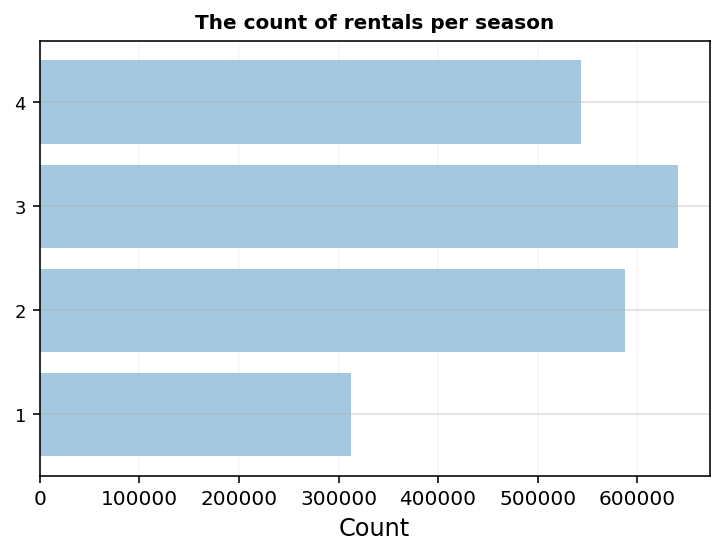

In [13]:
xticks = list(by_season.index)

#plotting
plt.barh([x for x in range(len(xticks))], list(by_season['count_season']), align='center', alpha=0.4)
plt.yticks([x for x in range(len(xticks))], xticks, fontsize=9)

plt.xlabel("Count", fontsize=12)
plt.title("The count of rentals per season", fontsize=10, fontweight='bold')
plt.gca().xaxis.grid(True,linestyle='-',alpha=0.1)
plt.gca().yaxis.grid(True,alpha=0.4)

**Result Analysis**:

As dataset introduction said, season - 1 = spring, 2 = summer, 3 = fall, 4 = winter; we can see people prefer to use bike sharing systems in summer and fall. 

We predict the reason is the weather feature, there are least rental in spring beacause the spring is cold  Washington, D.C. 

**The relationship between count of rentals and the weather features**

In [14]:
# rentals by hour, split by working day (or not)
by_weather = df_train.copy().groupby('weather')[['count']].agg(sum)
by_weather.columns = ['count_weather']
df = df.join(by_weather, on='weather')
by_weather

,count_weather
weather,
1,1476063
2,507160
3,102089
4,164


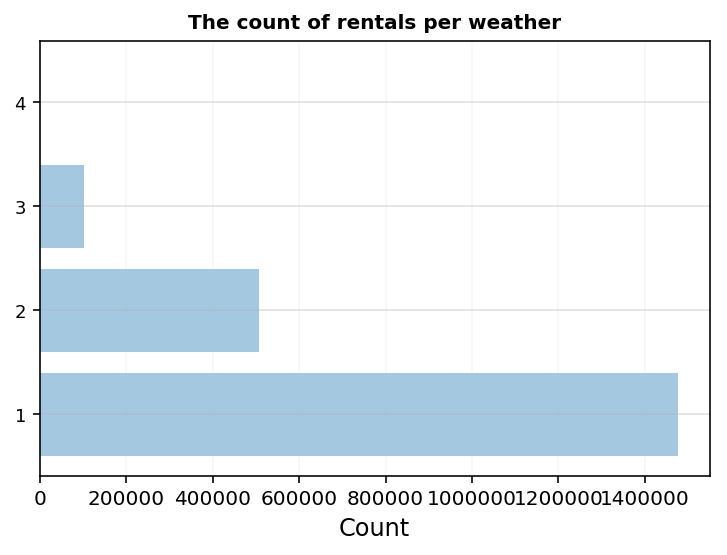

In [15]:
xticks = list(by_weather.index)

#plotting
plt.barh([x for x in range(len(xticks))], list(by_weather['count_weather']), align='center', alpha=0.4)
plt.yticks([x for x in range(len(xticks))], xticks, fontsize=9)

plt.xlabel("Count", fontsize=12)
plt.title("The count of rentals per weather", fontsize=10, fontweight='bold')
plt.gca().xaxis.grid(True,linestyle='-',alpha=0.1)
plt.gca().yaxis.grid(True,alpha=0.4)

**Result Analysis**:

As dataset introduction said, 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We predict the weather feature has very important influence of count.

**The relationship between count of rentals and the hour and working day (or not) features**

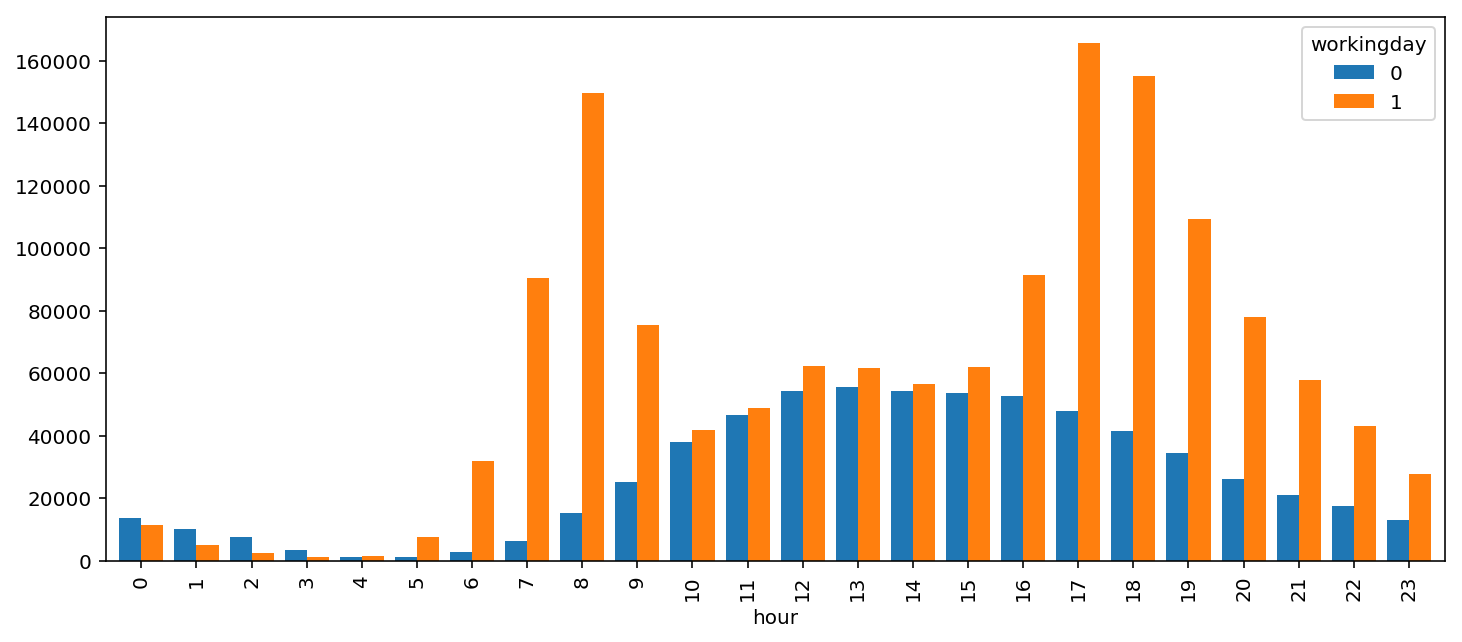

In [16]:
# rentals by hour, split by working day (or not)
by_hour = df_train.copy().groupby(['hour', 'workingday'])['count'].agg('sum').unstack()
by_hour.plot(kind='bar', figsize=(12,5), width=0.8);

**Result Analysis**:

1. riders prefer to using bike sharing systems on working day. 

2. On working day, the peak of using bike sharing systems are 5:00 - 6:00 am and 4:00 - 8:00 pm, beacause they are the rush hour.

3. On weekend day, the peak of using bike sharing systems are 11:00 am - 5:00 pm.  

**The relationship between count of rentals and the temp and working day (or not) features**

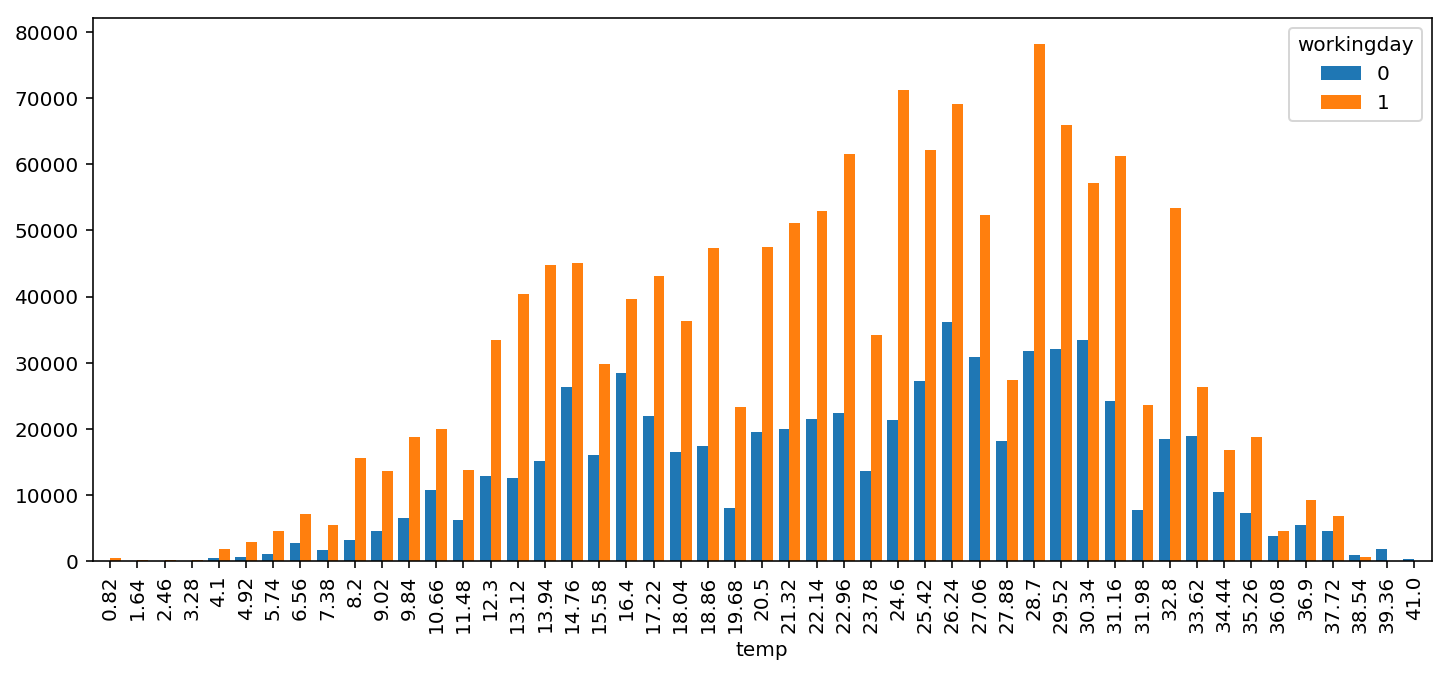

In [17]:
# rentals by temp, split by working day (or not)
by_hour = df_train.copy().groupby(['temp', 'workingday'])['count'].agg('sum').unstack()
by_hour.plot(kind='bar', figsize=(12,5), width=0.8);

**Result Analysis:**

No matter on the workingday or weekend, if the value of temp is between 28 Celsius and 31 Celsius, users prefer to use bike sharing system.

**The relationship between count of rentals and the windspeed and working day (or not) features**

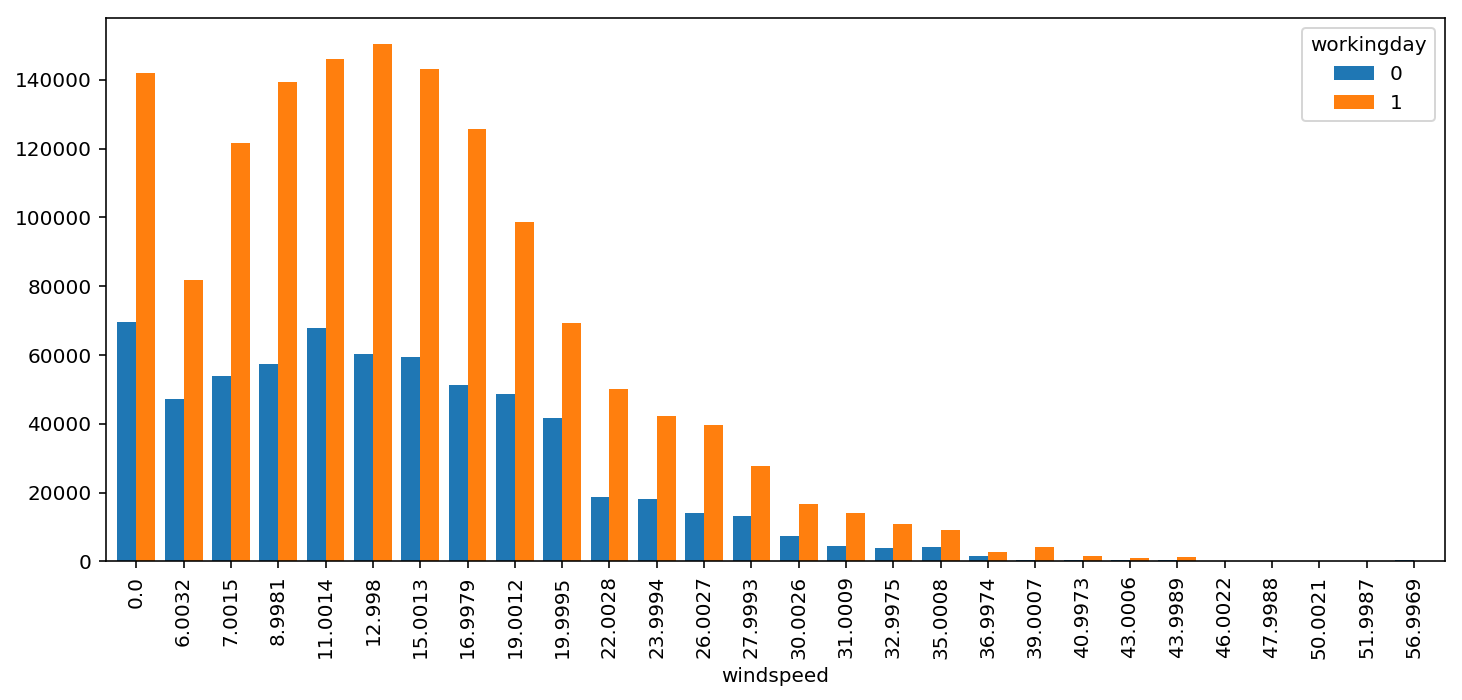

In [18]:
# rentals by windspeed, split by working day (or not)
by_hour = df_train.copy().groupby(['windspeed', 'workingday'])['count'].agg('sum').unstack()
by_hour.plot(kind='bar', figsize=(12,5), width=0.8);

**Result Analysis:**

No matter on the workingday or weekend, if the value of windspeed < 20, users prefer to use bike sharing system.

**The relationship between count of rentals and the humidity and working day (or not) features**

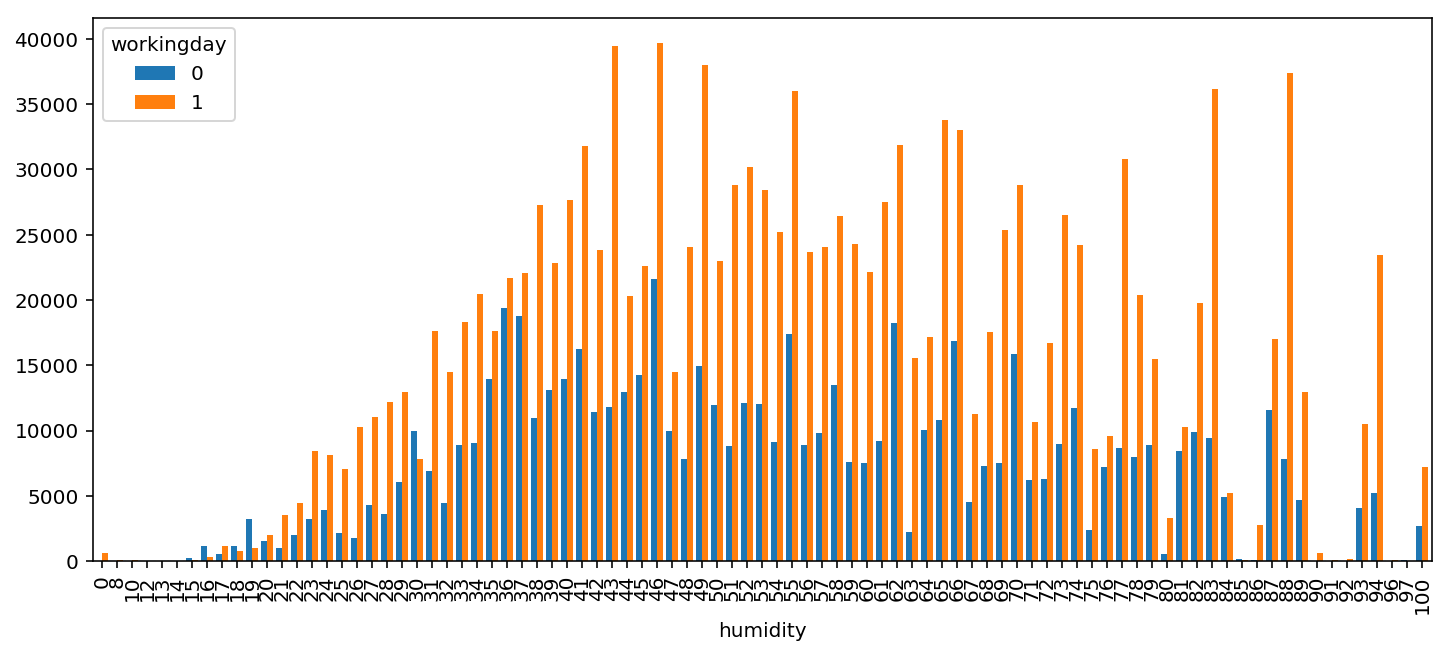

In [19]:
# rentals by humidity, split by working day (or not)
by_hour = df_train.copy().groupby(['humidity', 'workingday'])['count'].agg('sum').unstack()
by_hour.plot(kind='bar', figsize=(12,5), width=0.8);

**Result Analysis:**

if the value of 43< humidity < 60, users prefer to use bike sharing system.

## 3.2 Create additional features

As I mentioned above, the basic features are not enough for this project. I need create additional features to make my models work better. I will create 3 features which will based on feature hour, workingday, temp, windspeed, humidity

**create rush hour**

choose the basic features `hour` and `workingday` to create a new feature. As mentioned above, when on the workingday, if at 8:00 or at 12:00 or between 17:00 - 18:00, set the new feature `peak` as 1, otherwise set it as 0. Moreover, when on the weekend, if between 11:00 - 17:00, set the new feature `peak` as 1, otherwise set it as 0.

In [20]:
df['peak'] = df[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  11 <= x['hour'] <= 17)], axis = 1)
df_train['peak'] = df_train[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  11 <= x['hour'] <= 17)], axis = 1)
df_test['peak'] = df_test[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  11 <= x['hour'] <= 17)], axis = 1)

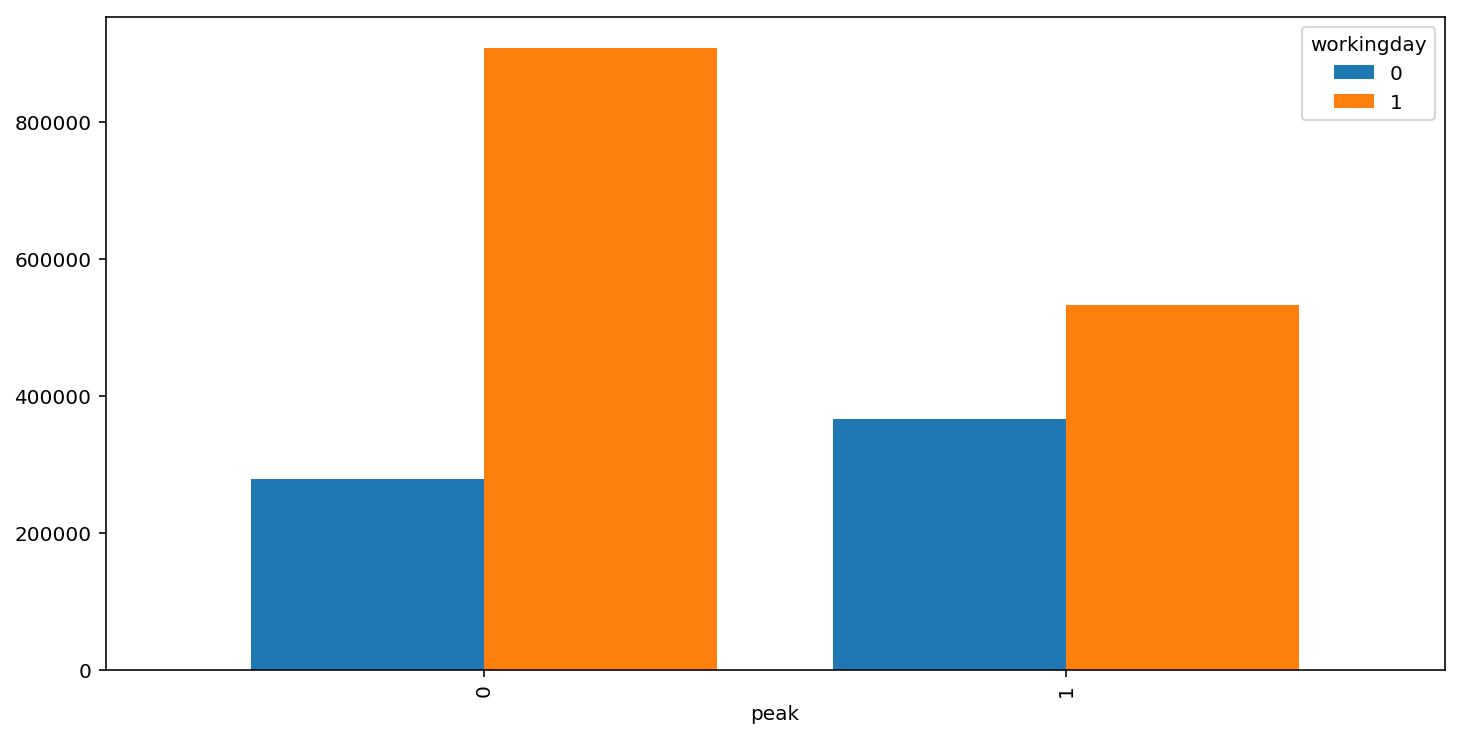

In [21]:
# rentals by peak, split by working day (or not)
by_hour = df_train.copy().groupby(['peak', 'workingday'])['count'].agg('sum').unstack()
by_hour.plot(kind='bar', figsize=(12,6), width=0.8);

**create ideal environment**

choose the basic features `temp` and `windspeed` to create a new feature. As mentioned above, when on the workingday, if the value of temp between 28 Celsius and 31 Celsius and windspeed less than 20, set the new feature ideal as 1, otherwise set it as 0.

In [22]:
df['ideal'] = df[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] > 28 and x['temp'] < 31 and x['windspeed'] < 20], axis = 1)
df_train['ideal'] = df_train[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] > 28 and x['temp'] < 20 and x['windspeed'] < 19], axis = 1)
df_test['ideal'] = df_test[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] > 28 and x['temp'] < 31 and x['windspeed'] < 20], axis = 1)

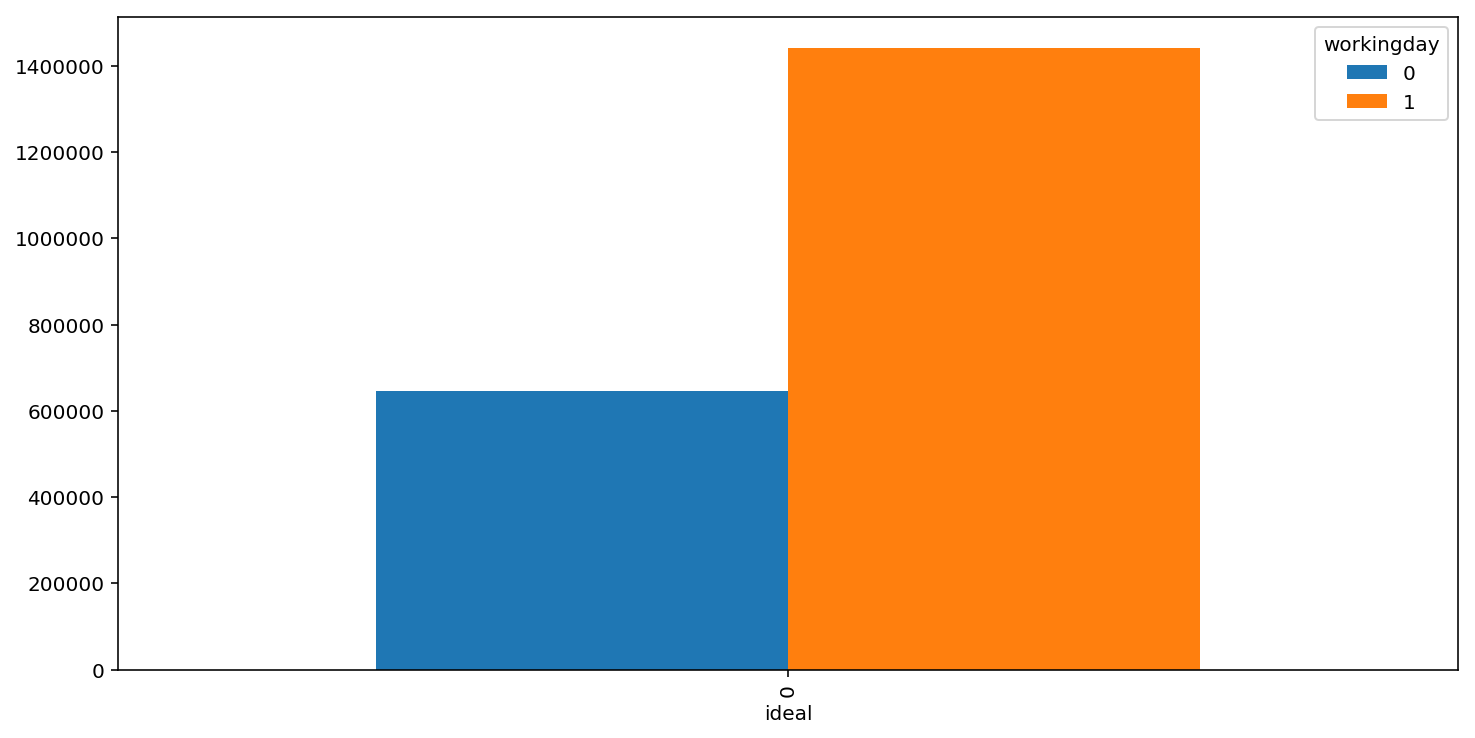

In [23]:
# rentals by ideal, split by working day (or not)
by_hour = df_train.copy().groupby(['ideal', 'workingday'])['count'].agg('sum').unstack()
by_hour.plot(kind='bar', figsize=(12,6), width=0.8);

**create sticky humidity**

choose the basic features humidity and workingday to create a new feature. As mentioned above, when on the workingday, if the value of humidity stickier than 60, set the new feature ideal as 1, otherwise set it as 0.

In [24]:
df['sticky'] = df[['humidity', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity'] >= 60], axis = 1)
df_train['sticky'] = df_train[['humidity', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity'] >= 60], axis = 1)
df_test['sticky'] = df_test[['humidity', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity'] >= 60], axis = 1)

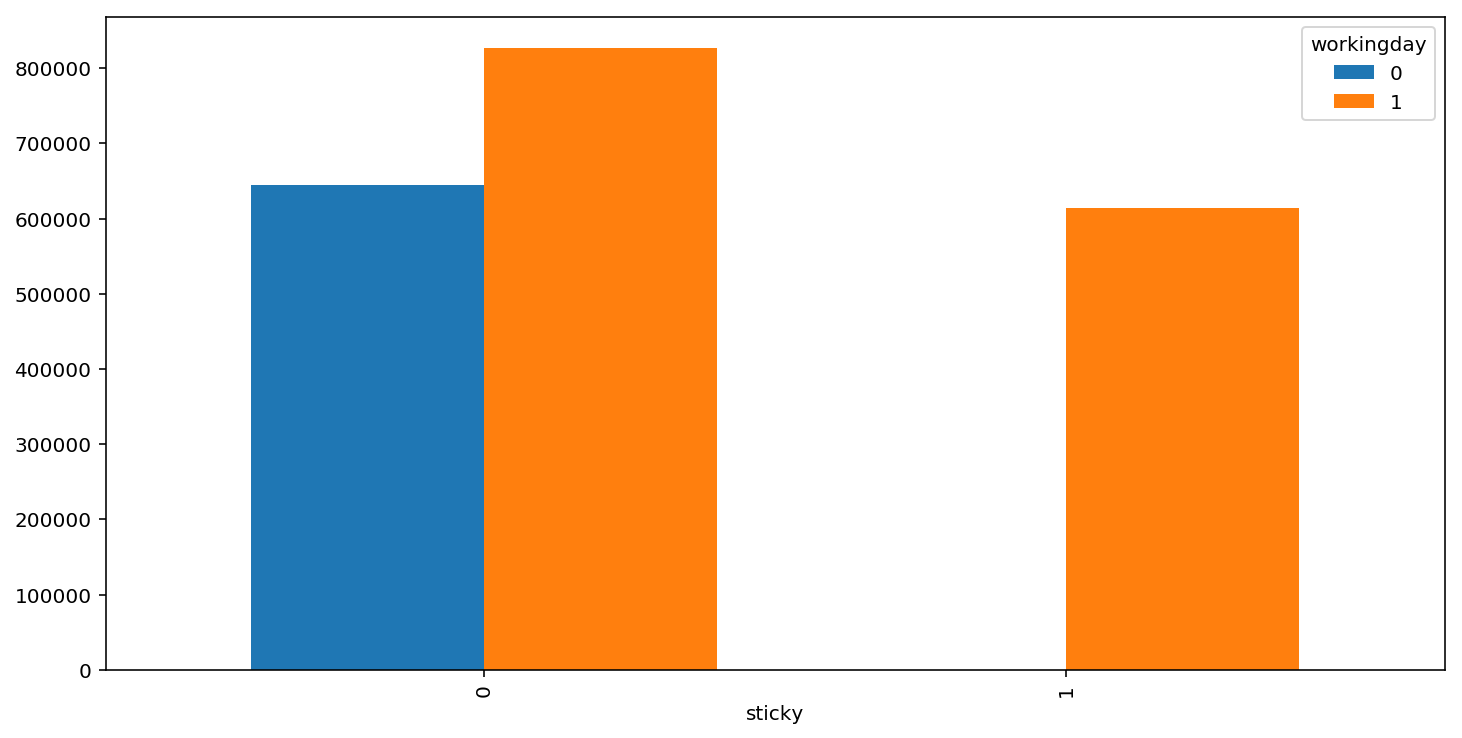

In [25]:
# rentals by sticky, split by working day (or not)
by_hour = df_train.copy().groupby(['sticky', 'workingday'])['count'].agg('sum').unstack()
by_hour.plot(kind='bar', figsize=(12,6), width=0.8);

In [26]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,year,DOW,casual_log,registered_log,count_log,count_season,count_weather,peak,ideal,sticky
2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,...,2011.0,5,1.386294,2.639057,2.833213,312498,1476063,0,0,0
2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,...,2011.0,5,2.197225,3.496508,3.713572,312498,1476063,0,0,0
2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,...,2011.0,5,1.791759,3.332205,3.496508,312498,1476063,0,0,0
2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,...,2011.0,5,1.386294,2.397895,2.639057,312498,1476063,0,0,0
2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,...,2011.0,5,0.000000,0.693147,0.693147,312498,1476063,0,0,0


# Part 4 Build Model 
**In this part, I build 2 machine learning and 1 deep learning models - random forest regression model, gradient boosting regressor model , and LSTM (RNN).**

Here I used two regression for ensemble model - RandomForestRegressor and GradientBoostingRegressor - can be import the packages from one library sklearn.ensemble.

LSTM is based on neural network, the first thing need to do is scaling data, and I used the neural network library Keras for LSTM, build a new model.

I will explain the three ones one by one after prepare and split data.

### RMSLE (Root Mean Squared Logarithmic Error)

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as
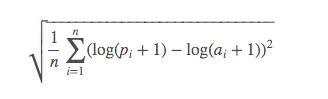
Where:
```
n is the number of hours in the test set
pi is your predicted count
ai is the actual count
log(x) is the natural logarithm
```
* License: RMSLE comes form kaggle website. https://www.kaggle.com/c/bike-sharing-demand#evaluation

In [27]:
def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

**get the train dataset from the combine data `df`**

In [28]:
def get_data():
    data = df[df['dataset'] == 'train'].copy()
#     print data
    return data

**split train set and validation set with day. Normally, the trainset is from the first day to 19th day. Set the train set when before 15th day, and the validation set between 15th day and 19th day.**

In [29]:
def train_test_split(data, cutoff_day=15.0):
    train = data[data['day'] <= cutoff_day]
#     print train
    test = data[data['day'] > cutoff_day]
    return train, test

**prepare the input tand target feature**

In [30]:
def prep_data(data, input_cols):
    X = data[input_cols].as_matrix()
    
    y_registered = data['registered_log'].as_matrix()
    y_casual = data['casual_log'].as_matrix()
    y_count = data['count_log'].as_matrix()
#     print y_registered
    return X, y_registered, y_casual,y_count

**for validation set, there will be two target feature to be validated.**
1. count directly. 
2. total = casual + registered

after set the model and input cols, using model.fit() to get the model_registered, model_casual, model_count and then predict the values: y_pred_count, y_pred_total using model.predict().

Remeber to set the values smaller than 0 to 0. 

Then, using get_rmsle(predict, actual) method to get the RMSLE result. The smaller, the better.

## For machine learning

**Scikit-learn**
Scikit-learn is a library that provides a variety of both supervised and unsupervised machine learning techniques as well as utilities for common tasks such as model selection, feature extraction, and feature selection.

Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. According to the scikit-learn tutorial "An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data." The API of an estimator looks roughly as follows:

![Screen%20Shot%202018-04-25%20at%202.17.41%20PM.png](https://image.ibb.co/nCfKd8/download_13.png)

The Estimator.fit method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array X of shape (n_samples, n_predictors) that holds the so-called feature matrix and a one-dimensional numpy array y that holds the responses (either class labels or regression values).

Estimators that can generate predictions provide an Estimator.predict method. In the case of regression, Estimator.predict will return the predicted regression values; it will return the corresponding class labels in the case of classification. Classifiers that can predict the probability of class membership have a method Estimator.predict_proba that returns a two-dimensional numpy array of shape (n_samples, n_classes) where the classes are lexicographically ordered.

In [31]:
def predict_on_validation_set(model, input_cols):
    data = get_data()

    train, test = train_test_split(data)

    X_train, y_train_registered, y_train_casual, y_train_count = prep_data(train, input_cols)
    X_test, y_test_registered, y_test_casual, y_test_count = prep_data(test, input_cols)
#     print X_test
    # for registered
    model_registered = model.fit(X_train, y_train_registered)
    y_pred_registered = np.exp(model_registered.predict(X_test)) - 1
    
    # for casual
    model_casual = model.fit(X_train, y_train_casual)
    y_pred_casual = np.exp(model_casual.predict(X_test)) - 1
    
    # for count directly
    model_count = model.fit(X_train, y_train_count)
    y_pred_count = np.exp(model_count.predict(X_test)) - 1
    
    # for count = registered + casual
    y_pred_total = np.round(y_pred_registered + y_pred_casual)
    y_pred_total[y_pred_total < 0] = 0

    y_test_count = np.exp(y_test_count) - 1
    y_test_total = np.exp(y_test_registered) + np.exp(y_test_casual) - 2
    
    score1 = get_rmsle(y_pred_count, y_test_count)
    score2 = get_rmsle(y_pred_total, y_test_total)
    return (y_pred_count, y_test_count, score1, y_pred_total, y_test_total, score2)

**Get the test dataset**

In [32]:
test_set = df[df['dataset'] == 'test'].copy()

**After building model, using model.predict() to predict the test dataset**

In [33]:
# predict on test set & transform output back from log scale
def predict_on_test_set(model, x_cols):
    # prepare training set
    train_set = df[df['dataset'] == 'train'].copy()
    X_train = df_train[x_cols].as_matrix()
    y_train_cas = train_set['casual_log'].as_matrix()
    y_train_reg = train_set['registered_log'].as_matrix()
    y_train_cnt = train_set['count_log'].as_matrix()

    # prepare test set
    X_test = test_set[x_cols].as_matrix()

    registered_model = model.fit(X_train, y_train_reg)
    y_pred_reg = registered_model.predict(X_test)
    y_pred_reg = np.exp(y_pred_reg) - 1
    
    casual_model = model.fit(X_train, y_train_cas)
    y_pred_cas = casual_model.predict(X_test)
    y_pred_cas = np.exp(y_pred_cas) - 1
    
    count_model = model.fit(X_train, y_train_cnt)
    y_pred_cnt = count_model.predict(X_test)
    y_pred_cnt = np.exp(y_pred_cnt) - 1
    # 1. count
    # 2. add casual & registered predictions together
    return y_pred_cnt, y_pred_reg + y_pred_cas

## 1. RandomForestRegressor Model

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.
 * The document is licensed by wiki: https://en.wikipedia.org/wiki/Wikipedia:Copyrights

![image.png](https://image.ibb.co/kb7zd8/download_14.png)

**Random Forest learning algorithm for regression. It supports both continuous and categorical features.**

### Parameters:

**n_estimators :** 

integer, optional (default=10)

The number of trees in the forest.


**max_depth :**

integer or None, optional (default=None)

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split :**

int, float, optional (default=2)

The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

**min_samples_leaf : **

int, float, optional (default=1)

The minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

**n_jobs :**

integer, optional (default=1)

The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.

  * the explain comes from http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


**The text and code in the document by The scikit contributions is licensed under the 3-Clause BSD:**
scikit-learn is a Python module for machine learning built on top of SciPy and distributed under the 3-Clause BSD license.

The project was started in 2007 by David Cournapeau as a Google Summer of Code project, and since then many volunteers have contributed. See the AUTHORS.rst file for a complete list of contributors.

It is currently maintained by a team of volunteers.

Website: http://scikit-learn.org

**Get the result of validation set**

In [34]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'day', 'month', 'ideal','peak', 'DOW','sticky'
    ]

(rf_p_count, rf_t_count, rf_score1, rf_p_total, rf_t_total, rf_score2) = predict_on_validation_set(rf_model, rf_cols)
print 'count = ' + str(rf_score1) + ' , total = '+ str(rf_score2)

count = 0.44353268319380657 , total = 0.44125110350369806


**Get the correlation of input features**

In [35]:
df[rf_cols].corr()

,weather,temp,atemp,windspeed,workingday,season,holiday,sticky,hour,day,month,ideal,peak,DOW,sticky
weather,1.000000,-0.107789,-0.111544,0.041872,0.044963,-0.011501,0.008763,0.248225,-0.022471,0.008163,0.005275,-0.078386,0.002180,-0.052096,0.248225
temp,-0.107789,1.000000,0.987806,-0.025226,0.057064,0.317391,-0.034502,-0.018377,0.140565,0.022104,0.209409,0.367535,0.098168,-0.030126,-0.018377
atemp,-0.111544,0.987806,1.000000,-0.064800,0.055862,0.324754,-0.037571,-0.006529,0.136463,0.015913,0.215998,0.361609,0.093011,-0.032428,-0.006529
windspeed,0.041872,-0.025226,-0.064800,1.000000,-0.007068,-0.144799,-0.004601,-0.185587,0.135325,0.018631,-0.132233,-0.089405,0.128549,0.000282,-0.185587
workingday,0.044963,0.057064,0.055862,-0.007068,1.000000,0.003368,-0.233644,0.537624,-0.000201,0.003859,-0.016177,0.009109,-0.143955,-0.707051,0.537624
season,-0.011501,0.317391,0.324754,-0.144799,0.003368,1.000000,0.007127,0.088996,-0.005030,-0.000695,0.831440,0.088876,-0.001592,-0.007993,0.088996
holiday,0.008763,-0.034502,-0.037571,-0.004601,-0.233644,0.007127,1.000000,-0.114282,0.003009,-0.002654,0.040795,-0.007477,0.031757,-0.173926,-0.114282
sticky,0.248225,-0.018377,-0.006529,-0.185587,0.537624,0.088996,-0.114282,1.000000,-0.186976,0.048370,0.097536,0.004857,-0.155035,-0.407644,1.000000
hour,-0.022471,0.140565,0.136463,0.135325,-0.000201,-0.005030,0.003009,-0.186976,1.000000,0.000637,-0.005216,0.053056,0.174206,0.000327,-0.186976
day,0.008163,0.022104,0.015913,0.018631,0.003859,-0.000695,-0.002654,0.048370,0.000637,1.000000,0.009329,-0.005618,0.002618,-0.009955,0.048370


**Show the graph with predict values and valid values**

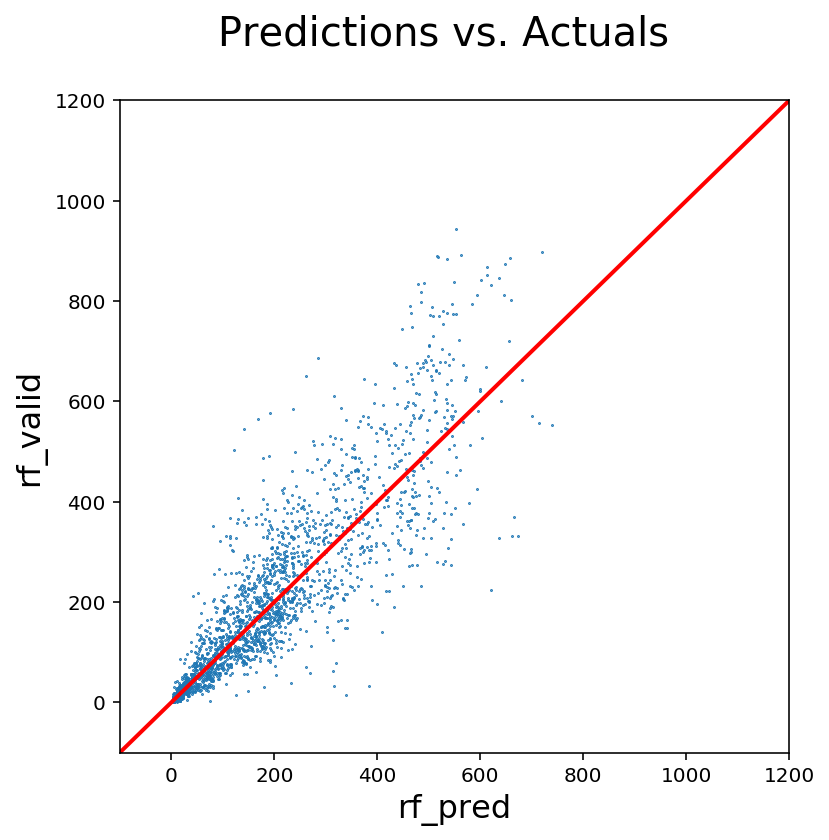

In [36]:
# Random Forest's predictions vs. actuals
plt.figure(figsize = (6,6))
plt.scatter(rf_p_count, rf_t_count, s = 0.2)
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.plot([-100, 1200],[-100, 1200], color ='r', linestyle = '-', linewidth = 2)
plt.suptitle('Predictions vs. Actuals', fontsize = 20)
plt.xlabel('rf_pred',fontsize = 16)
plt.ylabel('rf_valid',fontsize = 16)
plt.show()

**Result Analysis** 

the more point close to the red line, the better the result is. 

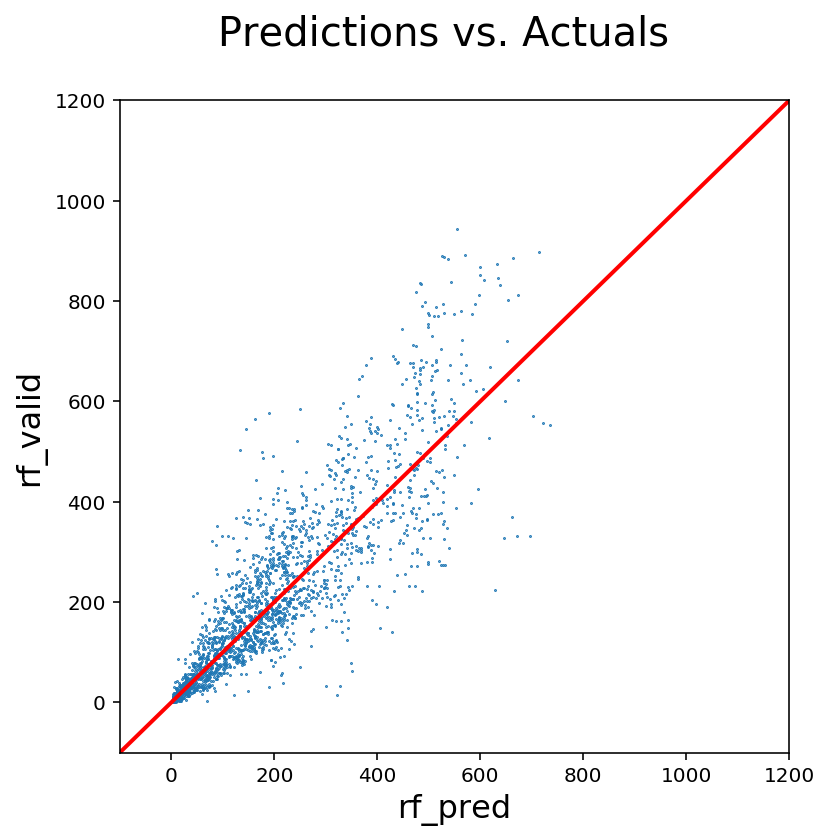

In [37]:
# Random Forest's predictions vs. actuals
plt.figure(figsize = (6,6))
plt.scatter(rf_p_total, rf_t_total, s = 0.2)
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.plot([-100, 1200],[-100, 1200], color ='r', linestyle = '-', linewidth = 2)
plt.suptitle('Predictions vs. Actuals', fontsize = 20)
plt.xlabel('rf_pred',fontsize = 16)
plt.ylabel('rf_valid',fontsize = 16)
plt.show()

**Result Analysis** 

the more point close to the red line, the better the result is. 

**Export the prediction into CSV**

In [55]:
rf_pred = predict_on_test_set(rf_model, rf_cols)
y_pred1 = np.round(rf_pred[0])
# output predictions for submission
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': y_pred1})
pred = pred[['datetime','count']]
pred.to_csv('submission1-1.csv', index=False)

Text(0,0.5,u'count')

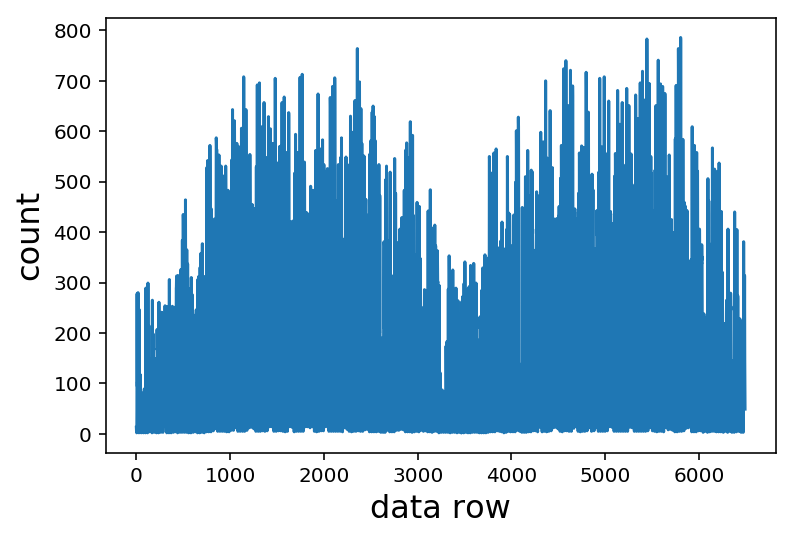

In [39]:
plt.plot(y_pred1)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('count',fontsize = 16)

**Result Analysis** 

It is the result of testset. It means the count value per row.

In [54]:
# rf_pred = predict_on_test_set(rf_model, rf_cols)
y_pred2 = np.round(rf_pred[1])
# output predictions for submission
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': y_pred2})
pred = pred[['datetime','count']]
pred.to_csv('submission1-2.csv', index=False)

Text(0,0.5,u'count = registered + casual')

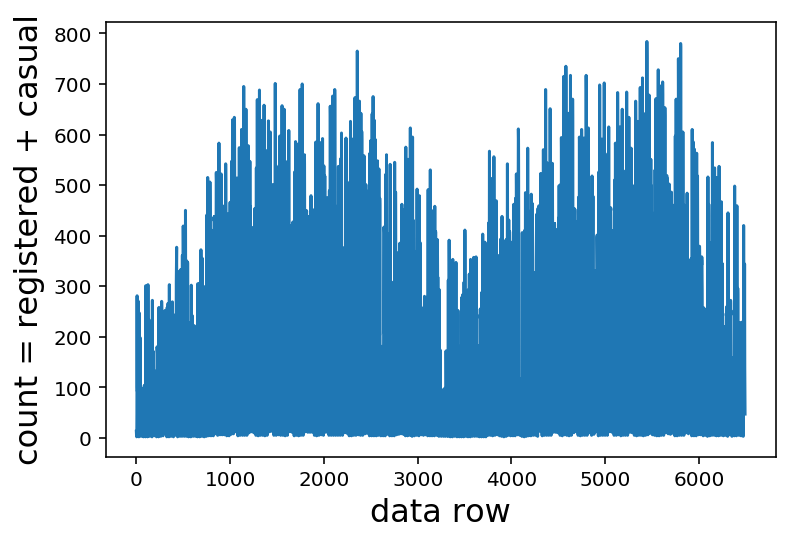

In [41]:
plt.plot(y_pred2)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('count = registered + casual',fontsize = 16)

**Result Analysis** 

It is the result of testset. It means the count value per row.

Text(0,0.5,u'the diff of two count')

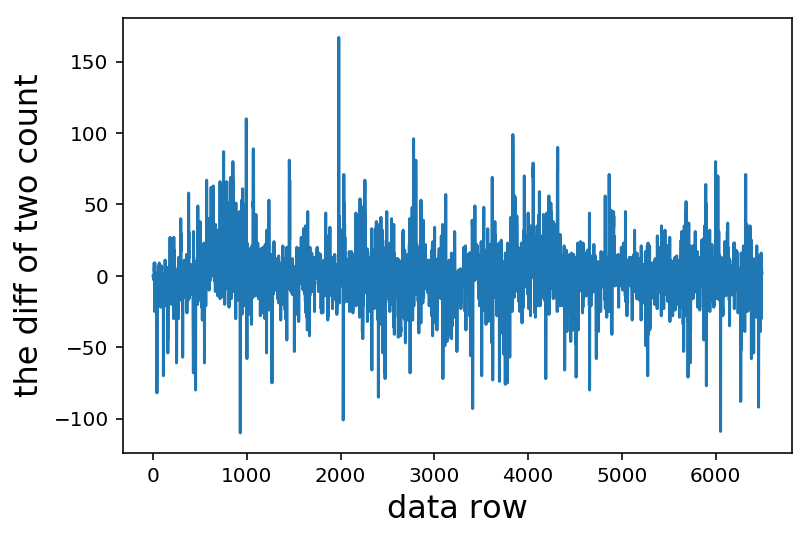

In [42]:
plt.plot(y_pred1-y_pred2)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('the diff of two count',fontsize = 16)

**Result Analysis** 

It is the difference of count values per row. The more close to 0, the more similar the two count are.

**Result Analysis:**
1. I tried to use different input features and get different values. Here I just give a better one. If want, just change the rf_cols values.
2. with the rmlse result: count = 0.44353268319380657 , total = 0.44125110350369806; it is clear that using the total number which is add registered and causal is better than predict count directly.

## 2. GradientBoostingRegressor

**GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.**

**Steps of Gradient Boost algorithm**

Step 1 : Assume mean is the prediction of all variables.

Step 2 : Calculate errors of each observation from the mean (latest prediction).

Step 3 : Find the variable that can split the errors perfectly and find the value for the split. This is assumed to be the latest prediction.

Step 4 : Calculate errors of each observation from the mean of both the sides of split (latest prediction).

Step 5 : Repeat the step 3 and 4 till the objective function maximizes/minimizes.

Step 6 : Take a weighted mean of all the classifiers to come up with the final model.

### parameters

**loss :**

{‘ls’, ‘lad’, ‘huber’, ‘quantile’}, optional (default=’ls’)

loss function to be optimized. ‘ls’ refers to least squares regression. ‘lad’ (least absolute deviation) is a highly robust loss function solely based on order information of the input variables. ‘huber’ is a combination of the two. ‘quantile’ allows quantile regression (use alpha to specify the quantile).

**n_estimators :**

int (default=100)

The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

**learning_rate :** 

float, optional (default=0.1)

learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
  * the explain comes from http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

**max_depth :** 

integer, optional (default=3)

maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

**min_samples_leaf :**

int, float, optional (default=1)

The minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

**The text and code in the document by The scikit contributions is licensed under the 3-Clause BSD:**
scikit-learn is a Python module for machine learning built on top of SciPy and distributed under the 3-Clause BSD license.

The project was started in 2007 by David Cournapeau as a Google Summer of Code project, and since then many volunteers have contributed. See the AUTHORS.rst file for a complete list of contributors.

It is currently maintained by a team of volunteers.

Website: http://scikit-learn.org

In [43]:
params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'DOW', 'year', 'ideal', 'peak', 'sticky'
]

(gbm_p_count, gbm_t_count, gbm_score1, gbm_p_total, gbm_t_total, gbm_score2) = predict_on_validation_set(gbm_model, gbm_cols)
print 'count = ' + str(gbm_score1) + ' , total = '+ str(gbm_score2)

count = 0.315007370141069 , total = 0.3147256174226919


**Get the correlation of input features**

In [44]:
df[gbm_cols].corr()

,weather,temp,atemp,humidity,windspeed,holiday,workingday,season,hour,DOW,year,ideal,peak,sticky
weather,1.000000,-0.107789,-0.111544,0.422054,0.041872,0.008763,0.044963,-0.011501,-0.022471,-0.052096,-0.019551,-0.078386,0.002180,0.248225
temp,-0.107789,1.000000,0.987806,-0.073318,-0.025226,-0.034502,0.057064,0.317391,0.140565,-0.030126,0.045827,0.367535,0.098168,-0.018377
atemp,-0.111544,0.987806,1.000000,-0.055858,-0.064800,-0.037571,0.055862,0.324754,0.136463,-0.032428,0.044518,0.361609,0.093011,-0.006529
humidity,0.422054,-0.073318,-0.055858,1.000000,-0.278874,0.003560,0.016415,0.149133,-0.275486,-0.038581,-0.083866,-0.015879,-0.209539,0.596380
windspeed,0.041872,-0.025226,-0.064800,-0.278874,1.000000,-0.004601,-0.007068,-0.144799,0.135325,0.000282,-0.010293,-0.089405,0.128549,-0.185587
holiday,0.008763,-0.034502,-0.037571,0.003560,-0.004601,1.000000,-0.233644,0.007127,0.003009,-0.173926,0.020162,-0.007477,0.031757,-0.114282
workingday,0.044963,0.057064,0.055862,0.016415,-0.007068,-0.233644,1.000000,0.003368,-0.000201,-0.707051,-0.000907,0.009109,-0.143955,0.537624
season,-0.011501,0.317391,0.324754,0.149133,-0.144799,0.007127,0.003368,1.000000,-0.005030,-0.007993,-0.001844,0.088876,-0.001592,0.088996
hour,-0.022471,0.140565,0.136463,-0.275486,0.135325,0.003009,-0.000201,-0.005030,1.000000,0.000327,-0.003861,0.053056,0.174206,-0.186976
DOW,-0.052096,-0.030126,-0.032428,-0.038581,0.000282,-0.173926,-0.707051,-0.007993,0.000327,1.000000,-0.001368,-0.001616,0.102553,-0.407644


**Show the graph with predict values and valid values**

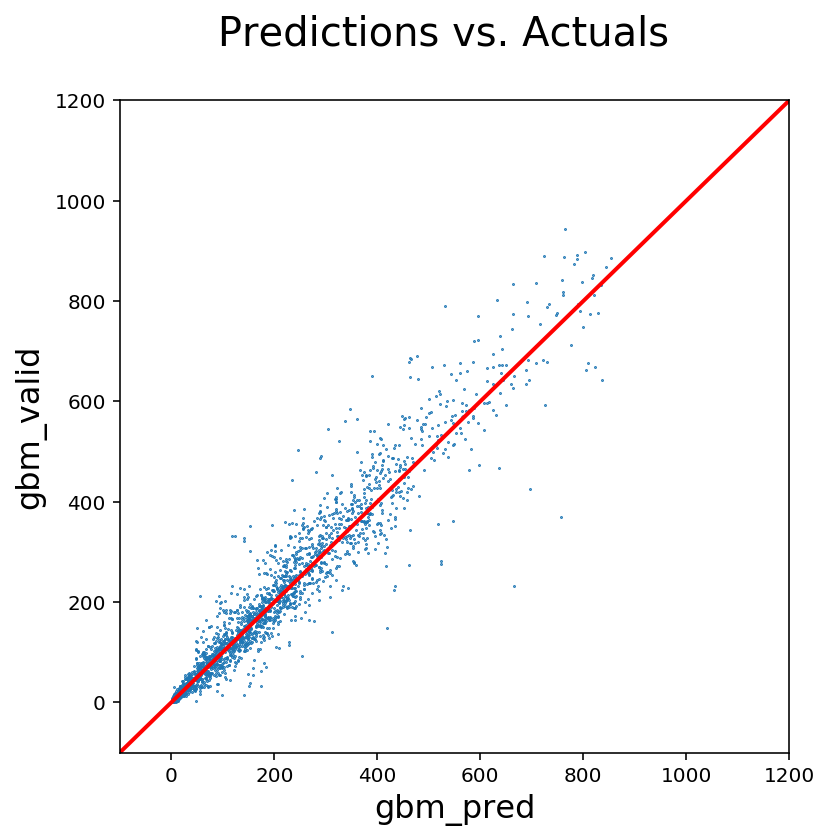

In [45]:
# Random Forest's predictions vs. actuals
plt.figure(figsize = (6,6))
plt.scatter(gbm_p_count, gbm_t_count, s = 0.2)
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.plot([-100, 1200],[-100, 1200], color ='r', linestyle = '-', linewidth = 2)
plt.suptitle('Predictions vs. Actuals', fontsize = 20)
plt.xlabel('gbm_pred',fontsize = 16)
plt.ylabel('gbm_valid',fontsize = 16)
plt.show()

**Result Analysis** 

the more point close to the red line, the better the result is. 

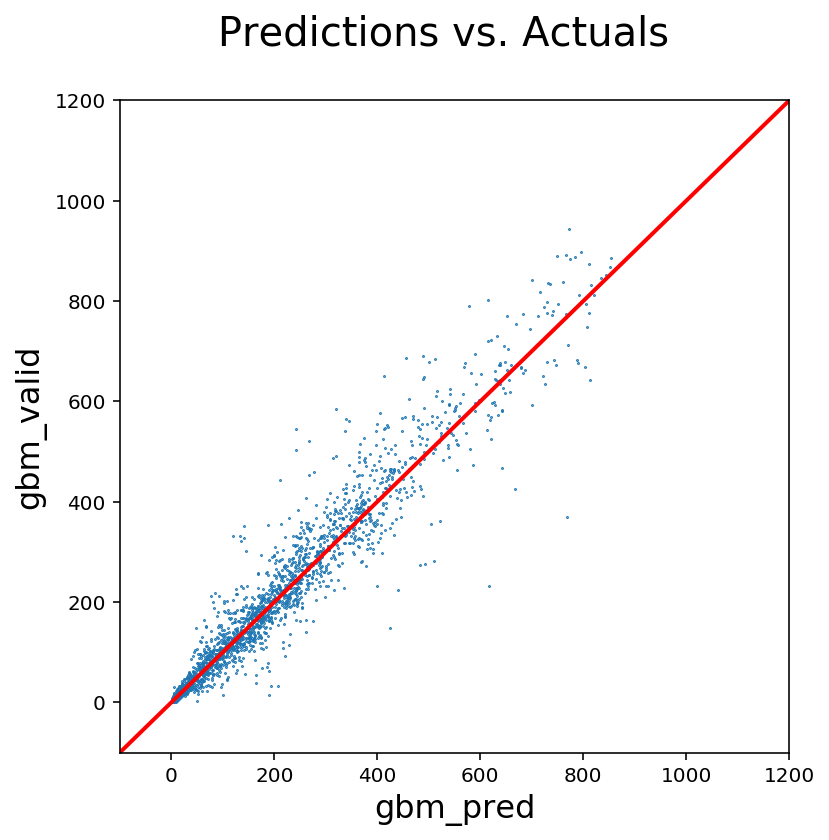

In [46]:
# Random Forest's predictions vs. actuals
plt.figure(figsize = (6,6))
plt.scatter(gbm_p_total, gbm_t_total, s = 0.2)
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.plot([-100, 1200],[-100, 1200], color ='r', linestyle = '-', linewidth = 2)
plt.suptitle('Predictions vs. Actuals', fontsize = 20)
plt.xlabel('gbm_pred',fontsize = 16)
plt.ylabel('gbm_valid',fontsize = 16)
plt.show()

**Result Analysis** 

the more point close to the red line, the better the result is. 

**Export the prediction into CSV**

In [53]:
gbm_pred = predict_on_test_set(gbm_model, gbm_cols)
y_pred3 = np.round(gbm_pred[0])
# output predictions for submission
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': y_pred3})
pred = pred[['datetime','count']]
pred.to_csv('submission2-1.csv', index=False)

Text(0,0.5,u'count')

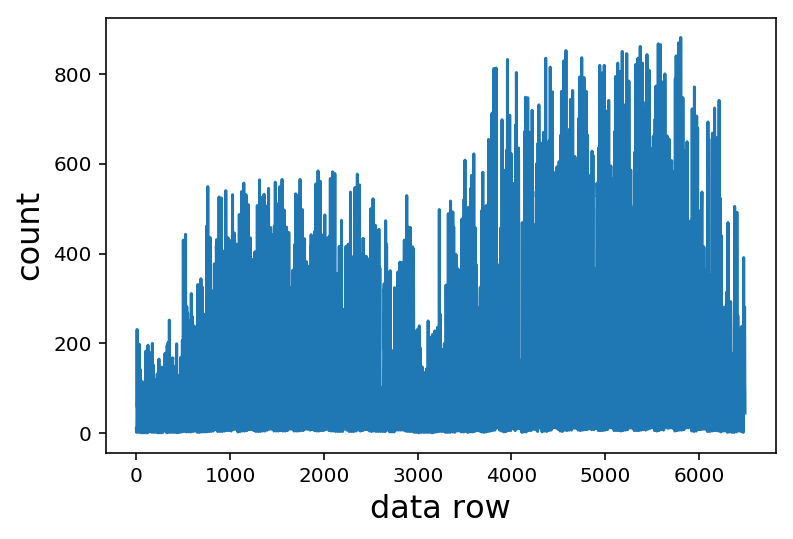

In [48]:
plt.plot(y_pred3)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('count',fontsize = 16)

**Result Analysis** 

It is the result of testset. It means the count value per row.

In [52]:
# gbm_pred = predict_on_test_set(gbm_model, gbm_cols)
y_pred4 = np.round(gbm_pred[1])
# output predictions for submission
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': y_pred4})
pred = pred[['datetime','count']]
pred.to_csv('submission2-2.csv', index=False)

Text(0,0.5,u'count = registered + casual')

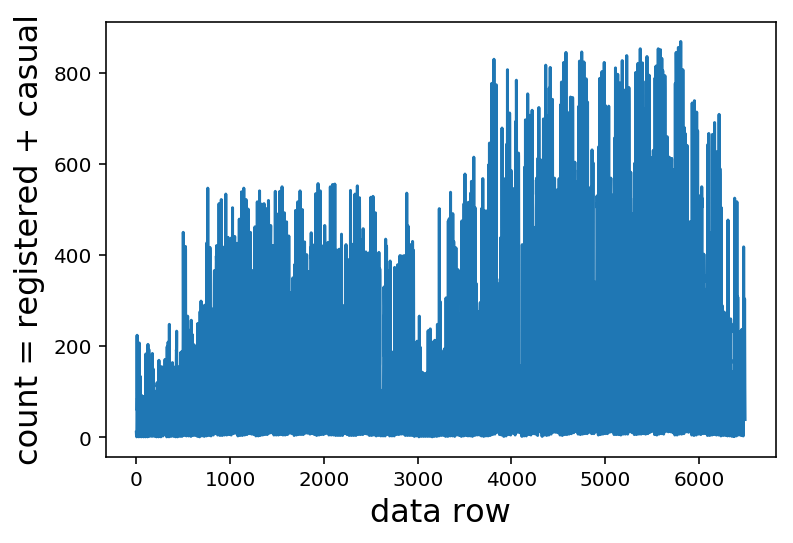

In [50]:
plt.plot(y_pred4)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('count = registered + casual',fontsize = 16)

**Result Analysis** 

It is the result of testset. It means the count value per row.

Text(0,0.5,u'the diff of two count')

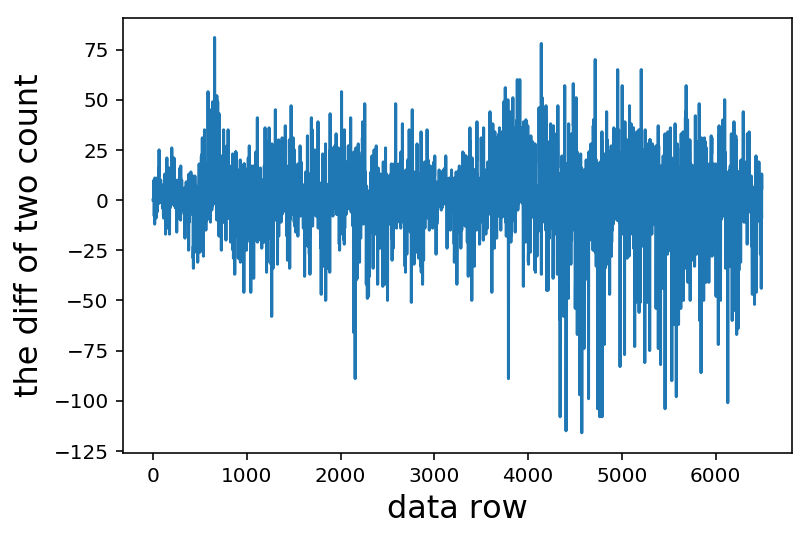

In [51]:
plt.plot(y_pred3-y_pred4)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('the diff of two count',fontsize = 16)

**Result Analysis** 

It is the difference of count values per row. The more close to 0, the more similar the two count are.

**Result Analysis:**
1. I tried to use different input features and get different values. Here I just give a better one. If want, just change the gbm_cols values.
2. with the rmlse result: count = 0.315007370141069 , total = 0.3147256174226919; it is clear that using the total number which is add registered and causal is better than predict count directly.
3. GradientBoostingRegressor is better than RandomForestRegressor for bike sharing dataset.

After I submit my result to kaggle, I can get the scores of test dataset as follows:

![Screen%20Shot%202018-04-25%20at%202.35.10%20PM.png](https://image.ibb.co/c8uRrT/download_15.png)

Here, we can see that GradientBoosting is the better one than RandomForest. Predict registered and casual sepreatly is better than predict count directly.

**Combine the two machine learning together**

In [62]:
y_p = np.round(.2*rf_p_total + .8*gbm_p_total)
print get_rmsle(y_p, rf_t_total)

0.3184189300346792


In [66]:
rf_pred = predict_on_test_set(rf_model, rf_cols)
gbm_pred = predict_on_test_set(gbm_model, gbm_cols)
y_pred5 = np.round(.2*rf_pred[0] + .8*gbm_pred[0])
# output predictions for submission
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': y_pred5})
pred = pred[['datetime','count']]
pred.to_csv('submission3-1.csv', index=False)

Text(0,0.5,u'count')

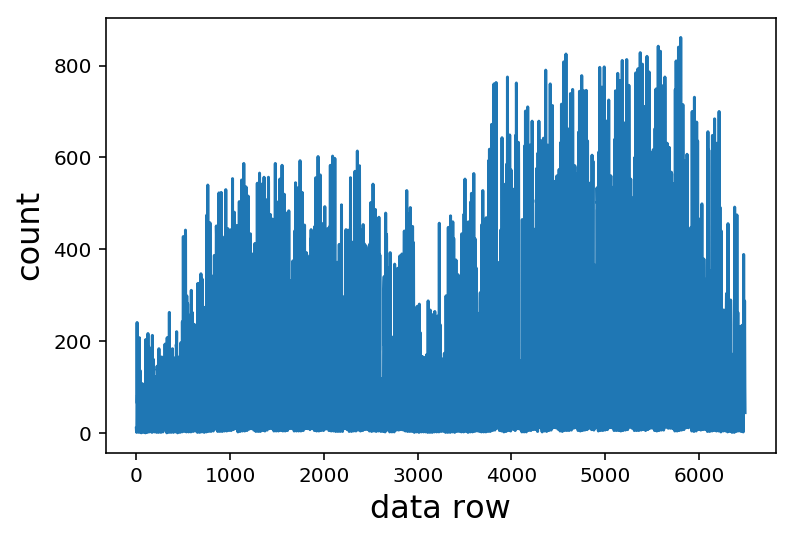

In [69]:
plt.plot(y_pred5)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('count',fontsize = 16)

**Result Analysis** 

It is the result of testset. It means the count value per row.

In [67]:
rf_pred = predict_on_test_set(rf_model, rf_cols)
gbm_pred = predict_on_test_set(gbm_model, gbm_cols)
y_pred6 = np.round(.2*rf_pred[1] + .8*gbm_pred[1])
# output predictions for submission
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': y_pred6})
pred = pred[['datetime','count']]
pred.to_csv('submission3-2.csv', index=False)

Text(0,0.5,u'count = registered + casual')

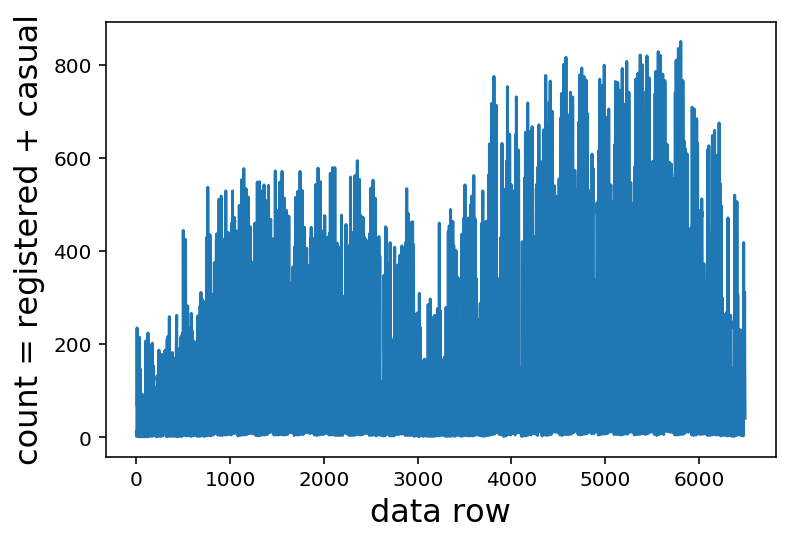

In [70]:
plt.plot(y_pred6)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('count = registered + casual',fontsize = 16)

**Result Analysis** 

It is the result of testset. It means the count value per row.

**Result Analysis**

Here we can see, the blend gives a better score on the leaderboard, even though it does not on the validation set

![Screen%20Shot%202018-04-25%20at%202.49.33%20PM.png](https://image.ibb.co/fSgpBT/download_16.png)

## Deep Learning - Sequential Model with LSTM Layers
## 1. Preparation before Model build:
### 1.1 Keras Perpare:
### backend engines - TensorFlow, Theano, or CNTK

Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. Rather than picking one single tensor library and making the implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras.

Here using the TensorFlow backend. (TensorFlow is an open-source symbolic tensor manipulation framework developed by Google. By default, Keras will use TensorFlow as its tensor manipulation library.)
```
pip install keras
pip install TensorFlow
pip install h5py (saving Keras models to disk).
```
### 1.2 Data Perpare:
1. get the train feature and target from train dataset.
2. scaling datas
3. split train dataset to train and validation data.
4. Generate dummy training data

**Delete the unuseful variables, get the feature `df_train_train` and target `df_test_train`.**

In [71]:
df = df.drop(['casual','registered','count','casual_log', 'registered_log', 'count_log','count_season', 'count_weather','dataset'], axis = 1)
df_train_train = df_train.drop(['datetime','casual','registered','count','dataset'], axis = 1)
df_test_train = df_train['count']

In [72]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,year,DOW,peak,ideal,sticky
2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,1.0,1.0,0.0,2011.0,5,0,0,0
2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,1.0,1.0,1.0,2011.0,5,0,0,0
2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,1.0,1.0,2.0,2011.0,5,0,0,0
2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,1.0,1.0,3.0,2011.0,5,0,0,0
2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,1.0,1.0,4.0,2011.0,5,0,0,0


**Scaling Variables**

To make training the network easier, standardize each of the continuous variables. Now shift and scale the variables such that they have zero mean and a standard deviation of 1.

reshape(): Gives a new shape to an array without changing its data.

In [73]:
# Scaling variables
scaler = StandardScaler()
scaler.fit(df_test_train.values.astype('float32').reshape(-1,1))
scalerx = StandardScaler()
scalerx.fit(df_train_train.values.astype('float32'))
df = df.apply(lambda x: scalerx.fit_transform(x.reshape(-1,1)).reshape(1,-1)[0] )
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,year,DOW,peak,ideal,sticky
2011-01-01 00:00:00,-1.348213,-0.18175,-1.469481,-0.669887,-1.320196,-1.078501,0.940609,-1.553872,-1.600161,-1.674066,-1.665259,-1.001369,0.99693,-0.511304,-0.318522,-0.790028
2011-01-01 01:00:00,-1.348213,-0.18175,-1.469481,-0.669887,-1.423723,-1.166609,0.888805,-1.553872,-1.600161,-1.674066,-1.520617,-1.001369,0.99693,-0.511304,-0.318522,-0.790028
2011-01-01 02:00:00,-1.348213,-0.18175,-1.469481,-0.669887,-1.423723,-1.166609,0.888805,-1.553872,-1.600161,-1.674066,-1.375975,-1.001369,0.99693,-0.511304,-0.318522,-0.790028
2011-01-01 03:00:00,-1.348213,-0.18175,-1.469481,-0.669887,-1.320196,-1.078501,0.629785,-1.553872,-1.600161,-1.674066,-1.231334,-1.001369,0.99693,-0.511304,-0.318522,-0.790028
2011-01-01 04:00:00,-1.348213,-0.18175,-1.469481,-0.669887,-1.320196,-1.078501,0.629785,-1.553872,-1.600161,-1.674066,-1.086692,-1.001369,0.99693,-0.511304,-0.318522,-0.790028


**Splitting the data into training, and validation sets**

Split the data into two sets, one for training and one for validating as the network is being trained. 

Train on 10311 samples, validate on 575 samples: choose the datas when at the first day per month as validation dataset.


In [74]:
def preprocess_nn(datax, datay):
    indexx = pd.DatetimeIndex(datax['datetime']).day 
    testindex = indexx == 1
    datax[datax.drop('datetime',axis=1).columns] = datax[datax.drop('datetime',axis=1).columns].apply(lambda x: scalerx.fit_transform(x.reshape(-1,1)).reshape(1,-1)[0] )
    datay[datay.drop('datetime',axis=1).columns] = scaler.transform(datay[datay.drop('datetime',axis=1).columns])
    train_x = datax[~testindex]
    train_y = datay[~testindex]
    test_x = datax[testindex]
    test_y = datay[testindex]
    return train_x, train_y, test_x, test_y

In [75]:
datax = df_train.drop(['casual','registered','count','dataset'], axis = 1)
datay = df_train[['datetime','count']]
pre1 = preprocess_nn(datax,datay)

**Generate dummy training data**

In [76]:
import datetime 
timesteps =1
def preshape_nn(data_set, look_back = timesteps):
    out1= []
    for val in range(len(data_set) - look_back + 1):
        end1 = datetime.datetime.strptime(data_set['datetime'].values[look_back - 1 + val],"%Y-%m-%d %H:%M:%S" )
        timesteps_array = []
        for it in range(look_back): 
            timesteps_array.append(np.datetime64(end1))
            end1 = end1 - datetime.timedelta(hours = 1)
        timesteps_array = timesteps_array[::-1]
        timestep_unit = df.loc[timesteps_array].values.astype('float32')
        out1.append(timestep_unit)
    datax = np.stack(out1, axis=0)
    return datax

def preshape_nn_y(data_set, look_back = timesteps ):
    return data_set.drop('datetime',axis = 1).values[look_back - 1:]


## 2. Model Explain:
  * `example:` https://keras.io/getting-started/sequential-model-guide/

###  2.1 Sequential Model:
The type of this model is the Sequential model, a linear stack of layers. The first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. 
```
from keras.models import Sequential
model = Sequential()
```
### 2.2 Stack Layers (Using .add() ):
#### Layers:
`example`:
```
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

core layer: Dense - regular densely-connected NN layer.
Recurrent Layer: LSTM - Long Short-Term Memory layer.
```

#### Activations:
```
Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers.

Available activations:
softmax, elu, selu, softplus, softsign, relu, tanh, sigmoid, hard_sigmoid, linear
```

### 2.3 Configure Learning Process (Using .compile()):
`example`:
```
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:
    * An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. See: optimizers.
    * A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. See: losses.
    * A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.
```

#### Loss Functions:
```
The actual optimized objective is the mean of the output array across all datapoints.

Available loss functions: 
mean_squared_error, mean_absolute_error,  mean_absolute_percentage_error, mean_squared_logarithmic_error, squared_hinge, hinge, categorical_hinge, logcosh
```

#### Optimizers:
```
SGD, RMSprop(This optimizer is usually a good choice for recurrent neural networks), Adagrad, Adadelta, Adam, Adamax, Nadam, TFOptimizer
```

### 2.4 Training Data (Using .fit()):
`example`:
```
model.fit(x_train, y_train, epochs=5, batch_size=32)
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function.
```
#### callbacks:
```
A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.

BaseLogger, TerminateOnNaN, ProgbarLogger, History, ModelCheckpoint, EarlyStopping, RemoteMonitor, LearningRateScheduler, TensorBoard (TensorBoard is a visualization tool provided with TensorFlow), ReduceLROnPlateau, CSVLogger, LambdaCallback
```

* all the explaintation comes form keras documentation. https://keras.io/

**The text and code in the document by The Keras contributions is licensed under the MIT:**

https://github.com/keras-team/keras/blob/master/LICENSE

https://opensource.org/licenses/MIT

In [80]:
from keras.callbacks import TensorBoard
def learn_nn(train_x, train_y, test_x, test_y, string):
    from keras.models import Sequential
    from keras.layers import LSTM, Dense, LSTMCell
    import numpy as np    

    data_dim = train_x.shape[-1] -1
    print data_dim
    # expected input data shape: (batch_size, timesteps, data_dim)
    
    # Here is the Sequential model:
    model = Sequential()
    
    #  Stacking layers is as easy as .add():


    #  Specifying the input shape
    #Stacked LSTM
    # returns a sequence of vectors of dimension 512
    model.add(LSTM(512, return_sequences=True,
                   input_shape=(timesteps, data_dim)))
    # returns a sequence of vectors of dimension 256
    model.add(LSTM(256, return_sequences=True))
    # returns a sequence of vectors of dimension 128
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(8, return_sequences=True)) 
    model.add(LSTM(4, return_sequences=True))
    model.add(LSTM(2))  
    model.add(Dense(1, activation='linear')) 


    #####
    # Once model looks good, configure its learning process with .compile():
    model.compile(loss='mean_squared_error',
                  optimizer='rmsprop')
    
    # Generate dummy training data
    x_train = preshape_nn(train_x)
    y_train  = preshape_nn_y(train_y) 

    # Generate dummy validation data
    x_val = preshape_nn(test_x)
    y_val = preshape_nn_y(test_y)#scaler.transform(test_y)
    
    # generate dummy validation data
    now = datetime.datetime.now()
    print now.strftime("%Y%m%d-%H%M%S")
    
    # iterate on training data in batches:
    model.fit(x_train, y_train,batch_size=100,epochs=200, verbose = 1,
              validation_data=(x_val, y_val),
              callbacks=[TensorBoard(log_dir='logs1/' + now.strftime("%Y%m%d-%H%M%S") + string + "/")])
    model.save("models/" + now.strftime("%Y%m%d-%H%M%S") + ".h5")
    return model

### 2.5 Evaluate your performance:

### evaluation: RMSLE (Root Mean Squared Logarithmic Error)

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as
![Screen%20Shot%202018-04-18%20at%206.33.29%20PM.png](https://image.ibb.co/hHWEBT/download_12.png)
Where:
```
n is the number of hours in the test set
pi is your predicted count
ai is the actual count
log(x) is the natural logarithm
```
* RMSLE comes form kaggle website. https://www.kaggle.com/c/bike-sharing-demand#evaluation

In [81]:
# evaluation: RMSLE (Root Mean Squared Logarithmic Error)
def model_eval_nn(model, prepro):
    trainScore = math.sqrt(mean_squared_error(scaler.inverse_transform(model.predict(preshape_nn(prepro[0]))), scaler.inverse_transform(preshape_nn_y(prepro[1]))))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore =  math.sqrt(mean_squared_error(scaler.inverse_transform(model.predict(preshape_nn(prepro[2]))), scaler.inverse_transform(preshape_nn_y(prepro[3]))))
    print('Test Score: %.2f RMSE' % (testScore)) 
    plt.plot(scaler.inverse_transform(model.predict(preshape_nn(prepro[2]))).reshape(-1,1) - scaler.inverse_transform(preshape_nn_y(prepro[3])).reshape(-1,1),'.')
def get_rmsle(model, prepro):
    diff = pd.DataFrame(np.log(scaler.inverse_transform(model.predict(preshape_nn(prepro[2]))).astype('float32') + 1) - np.log(scaler.inverse_transform(preshape_nn_y(prepro[3])).astype('float32') + 1))
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error).values[0]

### 2.6 Get The Result of RMSLE and Improve Model

Back to the third step - model build, change the layers, Loss Functions,Optimizers, callbacks and so on to improve the model until get the best result. The less RMSLE is, the better the model build.

16
20180425-150202
Train on 10311 samples, validate on 575 samples
Epoch 1/200
10311/10311 [==============================] - 16s 2ms/step - loss: 0.9957 - val_loss: 0.8456
Epoch 2/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.8947 - val_loss: 0.7220
Epoch 3/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.7537 - val_loss: 0.6072
Epoch 4/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.6275 - val_loss: 0.5035
Epoch 5/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.5052 - val_loss: 0.4756
Epoch 6/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.4081 - val_loss: 0.3659
Epoch 7/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.3414 - val_loss: 0.3315
Epoch 8/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.3027 - val_loss: 0.2931
Epoch 9/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.273

10311/10311 [==============================] - 10s 988us/step - loss: 0.0249 - val_loss: 0.0994
Epoch 78/200
10311/10311 [==============================] - 10s 984us/step - loss: 0.0251 - val_loss: 0.1027
Epoch 79/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.0244 - val_loss: 0.0983
Epoch 80/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0241 - val_loss: 0.0983
Epoch 81/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.0237 - val_loss: 0.1007
Epoch 82/200
10311/10311 [==============================] - 10s 994us/step - loss: 0.0232 - val_loss: 0.1053
Epoch 83/200
10311/10311 [==============================] - 10s 995us/step - loss: 0.0226 - val_loss: 0.0957
Epoch 84/200
10311/10311 [==============================] - 10s 994us/step - loss: 0.0229 - val_loss: 0.1010
Epoch 85/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0218 - val_loss: 0.0842
Epoch 86/200
10311/10311 [==============

Epoch 153/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0082 - val_loss: 0.1057
Epoch 154/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0085 - val_loss: 0.1032
Epoch 155/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0082 - val_loss: 0.1220
Epoch 156/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0074 - val_loss: 0.1056
Epoch 157/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0075 - val_loss: 0.1025
Epoch 158/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0070 - val_loss: 0.1058
Epoch 159/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0074 - val_loss: 0.1042
Epoch 160/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0071 - val_loss: 0.1051
Epoch 161/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0070 - val_loss: 0.1038
Epoch 162/200
10311/10311 [=

0.4394786

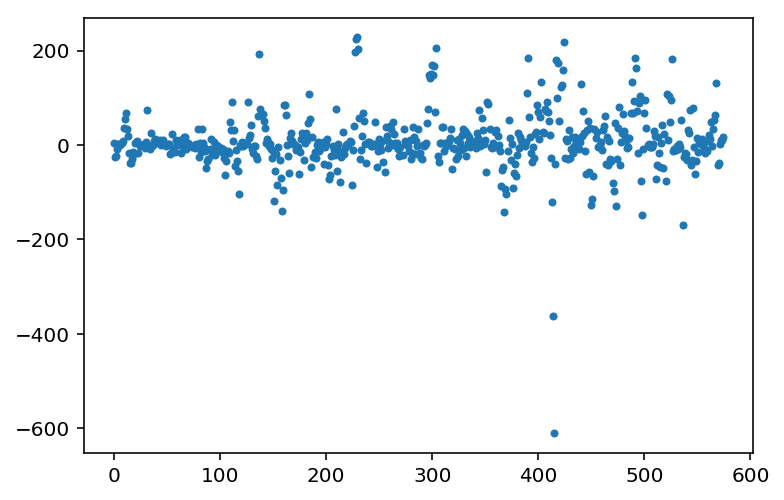

In [82]:
m1 = learn_nn(pre1[0],pre1[1],pre1[2],pre1[3],'MG')
model_eval_nn(m1,pre1)
get_rmsle(m1,pre1)

**Model Summary** 

In my model, I stack 9 LSTM layers on top of each other, making the model capable of learning higher-level temporal representations.

The first 8 LSTMs return the full output sequences, but the last one only returns the last step in its output sequence, thus dropping the temporal dimension (i.e. converting the input sequence into a single vector).


In [83]:
m1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 1, 512)            1083392   
_________________________________________________________________
lstm_11 (LSTM)               (None, 1, 256)            787456    
_________________________________________________________________
lstm_12 (LSTM)               (None, 1, 128)            197120    
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 64)             49408     
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 32)             12416     
_________________________________________________________________
lstm_15 (LSTM)               (None, 1, 16)             3136      
_________________________________________________________________
lstm_16 (LSTM)               (None, 1, 8)              800       
__________

### 2.7 Predict Test Data with Model

Get the test dataset, remeber scaler the dataset first, and then using model.predict() to predict the target values - `count`. Then, inverse scaler the target values and save it into excel. There are two ways to predict `count`. 
1. predict `count` and save values directly.
2. we can see `count = casual + registered` in train dataset. In this way, we can use model to predict `casual` and `registered` separately, and then add the two values together per row, the result should be the value of count. 
![Screen%20Shot%202018-04-19%20at%203.22.52%20PM.png](https://image.ibb.co/dOJVJ8/download_18.png)

**Generate dummy training data**

In [84]:
def preshape_nn_test(data_set, look_back = timesteps):
    out1= []
    for val in range(len(data_set)):
        end1 = datetime.datetime.strptime(data_set['datetime'].values[val],"%Y-%m-%d %H:%M:%S" )
        timesteps_array = []
        for it in range(look_back): 
            timesteps_array.append(np.datetime64(end1))
            end1 = end1 - datetime.timedelta(hours = 1)
        timesteps_array = timesteps_array[::-1]
        timestep_unit = df.loc[timesteps_array].values.astype('float32')
        out1.append(timestep_unit)
    datax = np.stack(out1, axis=0)
    return datax

In [85]:
df_test_test = df_test.copy()
df_test_test[df_test_test.drop(['datetime','dataset'],axis=1).columns] = df_test_test[df_test_test.drop(['datetime','dataset'],axis=1).columns].apply(lambda x: scalerx.fit_transform(x.reshape(-1,1)).reshape(1,-1)[0] )
df_test_r = preshape_nn_test(df_test_test)

### 2.7.1 prdict count directly

Here the target count should be 0 or positive integer. After get the output, before save it into excel, remeber transfer the numbers into int, and if the values are smaller than 0, let them equal to 0.

In [86]:
pred = m1.predict(df_test_r)
out = scaler.inverse_transform(pred).astype(int)
out[out<=0] = 0
out = out[:,0]
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': out})
pred = pred[['datetime','count']]
pred.to_csv("submission4-1.csv", index = False)

Text(0,0.5,u'count')

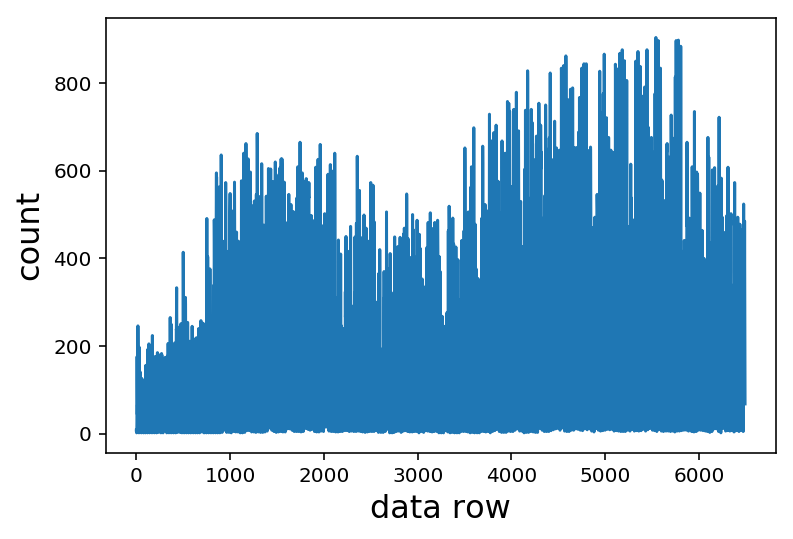

In [87]:
plt.plot(out)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('count',fontsize = 16)

**Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.**

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

**The text in the document by The Scipy community is licensed under SciPy.org:
https://www.scipy.org/scipylib/license.html**

[0.9974669]


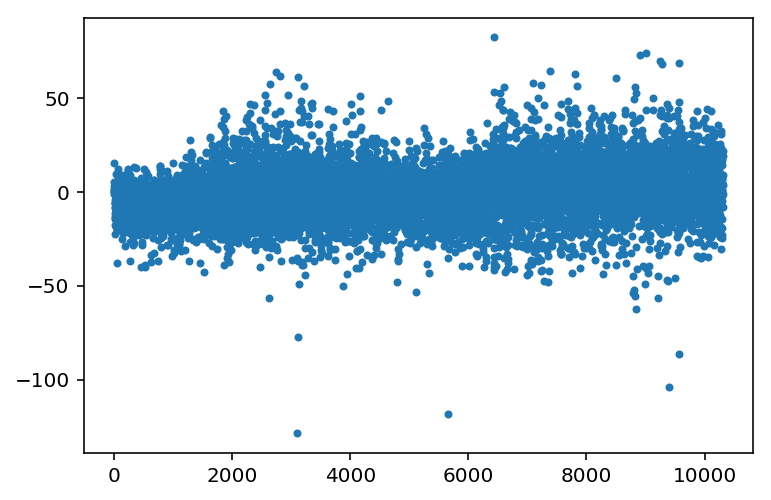

In [88]:
import scipy as scipy
plt.plot(scaler.inverse_transform(m1.predict(preshape_nn(pre1[0])))-scaler.inverse_transform(preshape_nn_y(pre1[1])).reshape(-1,1),'.')
print scipy.stats.pearsonr(scaler.inverse_transform(m1.predict(preshape_nn(pre1[0]))),scaler.inverse_transform(preshape_nn_y(pre1[1])).reshape(-1,1))[0]

### 2.7.2 predict casual and registered separately, and then add the two values together

**predict the casual number**

16
20180425-154422
Train on 10311 samples, validate on 575 samples
Epoch 1/200
10311/10311 [==============================] - 22s 2ms/step - loss: 0.6355 - val_loss: 0.4622
Epoch 2/200
10311/10311 [==============================] - 13s 1ms/step - loss: 0.2895 - val_loss: 0.1503
Epoch 3/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0760 - val_loss: 0.0326
Epoch 4/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0270 - val_loss: 0.0211
Epoch 5/200
10311/10311 [==============================] - 10s 999us/step - loss: 0.0199 - val_loss: 0.0207
Epoch 6/200
10311/10311 [==============================] - 13s 1ms/step - loss: 0.0172 - val_loss: 0.0187
Epoch 7/200
10311/10311 [==============================] - 12s 1ms/step - loss: 0.0150 - val_loss: 0.0225
Epoch 8/200
10311/10311 [==============================] - 14s 1ms/step - loss: 0.0131 - val_loss: 0.0157
Epoch 9/200
10311/10311 [==============================] - 15s 1ms/step - loss: 0.0

Epoch 77/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0029 - val_loss: 0.0170
Epoch 78/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0028 - val_loss: 0.0186
Epoch 79/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0027 - val_loss: 0.0211 loss: 0.002
Epoch 80/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.0028 - val_loss: 0.0200
Epoch 81/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0026 - val_loss: 0.0193
Epoch 82/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.0026 - val_loss: 0.0175
Epoch 83/200
10311/10311 [==============================] - 10s 992us/step - loss: 0.0026 - val_loss: 0.0180
Epoch 84/200
10311/10311 [==============================] - 10s 995us/step - loss: 0.0025 - val_loss: 0.0213
Epoch 85/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0025 - val_loss: 0.0188
Epoch 86/200
10311/10

0.64331216

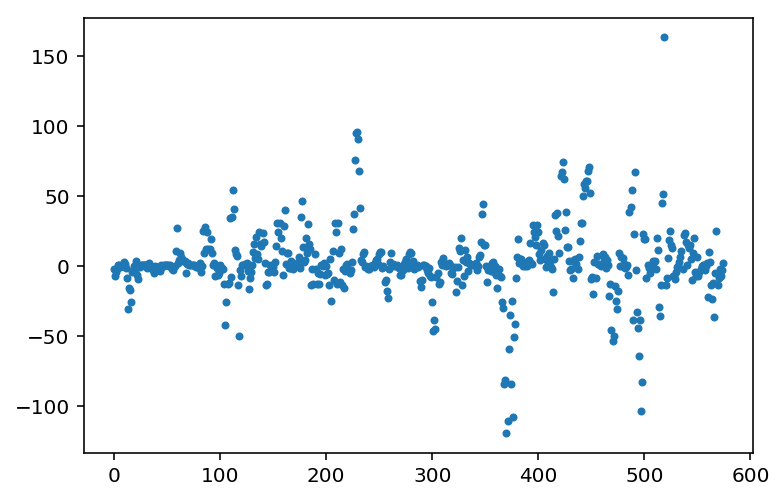

In [89]:
pre2 = preprocess_nn(df_train.drop(['casual','registered','count','dataset'], axis = 1),df_train[['datetime','casual']])
m2 = learn_nn(pre2[0],pre2[1],pre2[2],pre2[3],'MC')
model_eval_nn(m2,pre2)
get_rmsle(m2,pre2)

**predict the registered number**

16
20180425-162337
Train on 10311 samples, validate on 575 samples
Epoch 1/200
10311/10311 [==============================] - 22s 2ms/step - loss: 0.6716 - val_loss: 0.5398
Epoch 2/200
10311/10311 [==============================] - 13s 1ms/step - loss: 0.5181 - val_loss: 0.4196
Epoch 3/200
10311/10311 [==============================] - 13s 1ms/step - loss: 0.4141 - val_loss: 0.3324
Epoch 4/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.3323 - val_loss: 0.2857
Epoch 5/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.2918 - val_loss: 0.2696
Epoch 6/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.2515 - val_loss: 0.2070
Epoch 7/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.1979 - val_loss: 0.1888
Epoch 8/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.1538 - val_loss: 0.1519
Epoch 9/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.125

10311/10311 [==============================] - 11s 1ms/step - loss: 0.0179 - val_loss: 0.0769
Epoch 78/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.0173 - val_loss: 0.0712
Epoch 79/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0175 - val_loss: 0.0790
Epoch 80/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.0167 - val_loss: 0.0708
Epoch 81/200
10311/10311 [==============================] - 10s 1ms/step - loss: 0.0167 - val_loss: 0.0739
Epoch 82/200
10311/10311 [==============================] - -3s -332us/step - loss: 0.0165 - val_loss: 0.0834
Epoch 83/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0161 - val_loss: 0.0760
Epoch 84/200
10311/10311 [==============================] - 11s 1ms/step - loss: 0.0155 - val_loss: 0.0689
Epoch 85/200
10311/10311 [==============================] - 13s 1ms/step - loss: 0.0157 - val_loss: 0.0656
Epoch 86/200
10311/10311 [=====================

0.50760037

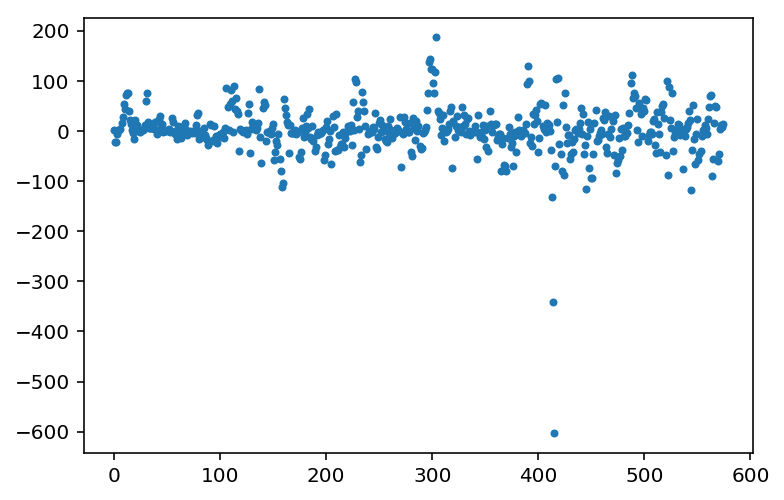

In [90]:
pre3 = preprocess_nn(df_train.drop(['casual','registered','count','dataset'], axis = 1),df_train[['datetime','registered']])
m3 = learn_nn(pre3[0],pre3[1],pre3[2],pre3[3],'MR')
model_eval_nn(m3,pre3)
get_rmsle(m3,pre3)

**Transfer the numbers into int, and if the values are smaller than 0, let them equal to 0.**

In [91]:
out2 = scaler.inverse_transform(m2.predict(preshape_nn_test(df_test))).astype(int)
out3 = scaler.inverse_transform(m3.predict(preshape_nn_test(df_test))).astype(int)
out2[out2<0] = 0
out3[out3<0] = 0

out2 = out2[:,0]
out3 = out3[:,0]


**Count = Casual + Registered**

In [92]:
outb = np.array(out2 + out3)
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': outb})
pred = pred[['datetime','count']]
pred.to_csv("submission4-2.csv", index = False)

Text(0,0.5,u'count')

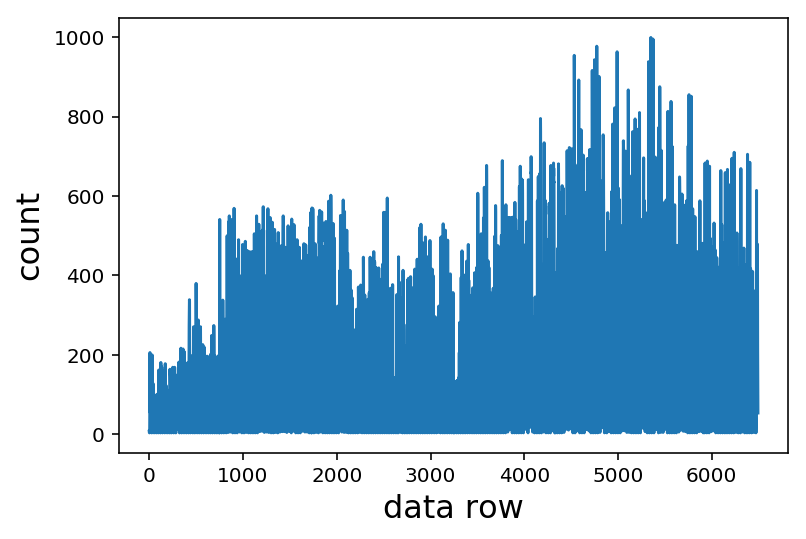

In [93]:
plt.plot(outb)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('count',fontsize = 16)

**Plot out versus outb as lines and/or markers.**

Text(0,0.5,u'the diff of two count')

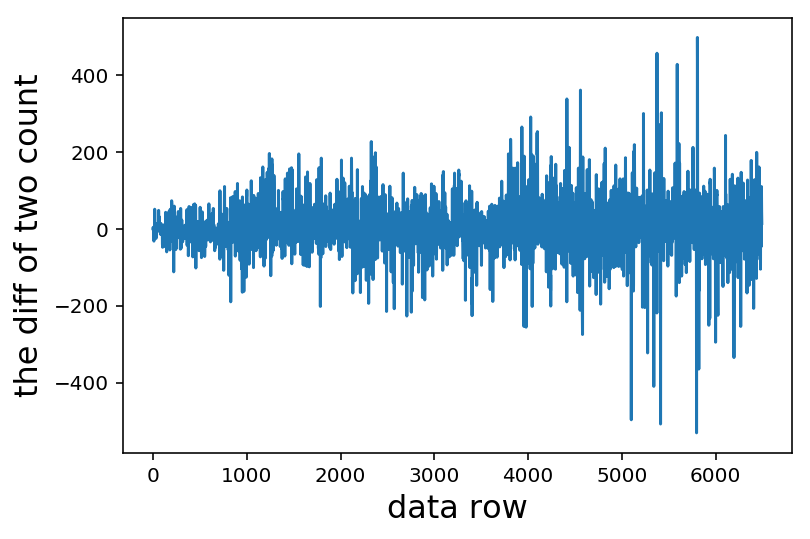

In [94]:
plt.plot(out-outb)
plt.xlabel('data row',fontsize = 16)
plt.ylabel('the diff of two count',fontsize = 16)

## 3. Result Analysis: 
1. I tried to use different active functions, loss functions and so on to get different values. Here I just give a better one.

2. with the rmlse result: count = 0.56714, total = 0.57256; it is clear that using the LSTM is not better than RandomForest. But It is a final project, the propose is to learn how to using deep learning. As professor suggested, I used LSTM here.

3. For LSTM model, predict count driectly will be better.

![Screen%20Shot%202018-04-25%20at%209.33.52%20PM.png](https://image.ibb.co/iZ77y8/download_19.png)

#  Part 5 - Conclusion:
#### 1. It is clear that the engineered features provide more information for the regression models, allowing them to make better predictions, as is the case of the features rush hours, ideal temperature and humidity, along with the indicators for sticky weather.
#### 2. It is clear that for the two machine learning model, predict count using registered and causal seprately is better than predict count directly. For the deep learning model - LSTM, predict count directly is better.
#### 3. With the implemented solution it was clear that the better model is combination of Random Forest and Gradient Boosting .
     * Model Random Forest:
        * RandomForestRegressor:  count = 0.46994 , total = 0.46483
        * GradientBoostingRegressor: count = 0.37290 , total = 0.36618
        * Combination: count = 0.37106 , total = 0.36388
     * Model LSTM: count = 0.56714 , total = 0.57256

![Screen%20Shot%202018-04-25%20at%202.55.22%20PM.png](https://image.ibb.co/m6ubrT/download_20.png)

The code in the document is licensed under the MIT License: https://opensource.org/licenses/MIT


All writing in the document is licensed bt The Creative Commons Attribution 3.0  https://creativecommons.org/licenses/by/3.0/us/.